<a href="https://colab.research.google.com/github/belenkf/belenkf/blob/main/TP_Final_Bicicletas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cabecera de Documentación

## Autor

María Belén Fabbrizi

## Fecha

Julio de 2024

# Librerías

In [ ]:
!pip install graphviz pydotplus
!pip install scikit-learn
!pip install -q imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import pydotplus
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import statsmodels.formula.api as sm
from scipy.stats import chi2_contingency
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
!pip install pyspellchecker
from spellchecker import SpellChecker

spell = SpellChecker()

def check_spelling(text):
  misspelled = spell.unknown(text.split())
  for word in misspelled:
    print(f"Possible mistake: {word}, Suggestions: {spell.candidates(word)}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 13.5 MB/s eta 0:00:00


# Carga y Contexto del Data Set

El Data Set escogido es uno de los provistos por la docente, enfocado en el área de compras y marketing. Los datos en cuestión corresponden a un registro de personas, con sus respectivos datos, y una asginación de tipo "sí o no" a la condición de ser compradores de bicicletas. De este modo, a partir del análisis de los casos en cuestión, se busca identificar patrones y tendencias que permitan llevar a cabo un modelo predictivo de las posibles ventas. Luego, se utilizan herramientas de análisis estadístico para relacionar la relevancia de variables tales como el el género, el nivel de ingresos, la cantidad de hijos, el nivel de educación, y la ocupación, a la hora de influir en la decisión, del cliente, de comprar o no una bicicleta.

In [ ]:
data = "/content/drive/MyDrive/TP Final individual/data.csv"

In [ ]:
dataset = pd.read_csv(data)
df = pd.DataFrame(dataset)

In [ ]:
print(dataset.shape)

(10000, 13)


El Data Set en cuestión cuenta con un total de 10000 casos registrados distribuidos en filas, donde cada una corresponde a una persona en particular. A su vez, el mismo cuenta con 13 columnas, siendo 11 de ellas, características que corresponden a cada uno de los individuos en cuestión. Por otro lado, la columna número 13 indica, mediante la clasificación de lógica binomial "sí o no", si la persona registrada compró, o no, al menos una bicicleta (el Data Set provisto no especifica si la venta, en caso de ser concretada, incluye 1 o más artículos). Dicha columna es aquella que recibe especial atención, dado que el objetivo del modelo descriptivo es determinar el posible éxito de las futuras ventas. Es decir, se busca la predicción de la asignación del valor "yes" a los futuros potenciales clientes. Por último, y a modo de aclaración, la primer columna, denominada "ID" no es más que un mero ordenamiento, por medio de la asignación de un valor numérico arbitrario, a cada uno de los individuos que fueron registrados. De tal forma, se determina que dicha columna no posee relevancia en el análisis de los datos provistos.

#Objetivo

Desarrollar un modelo de aprendizaje qué, a partir de los datos provistos, permita predecir la compra de bicicletas por parte de los potenciales clientes. Se busca que permita a la empresa tomar decisiones, basadas en estrategias de marketing, optimizando así sus esfuerzos y recursos para maximizar las ventas de bicicletas.

# Diccionario

In [ ]:
diccionario = {
    'ID': 'Identificador único del cliente',
    'Marital Status': 'Estado civil del cliente',
    'Gender': 'Género del cliente',
    'Yearly Income': 'Ingresos anuales del cliente',
    'Children': 'Número de hijos del cliente',
    'Education': 'Nivel de educación del cliente',
    'Occupation': 'Ocupación del cliente',
    'Home Owner': 'Si el cliente es propietario de una vivienda',
    'Cars': 'Número de automóviles que posee el cliente',
    'Commute Distance': 'Distancia que recorre el cliente para ir al trabajo',
    'Region': 'Región donde vive el cliente',
    'Age': 'Edad del cliente',
    'BikeBuyer': 'Si el cliente compró una bicicleta'
}

# Exploración y Visualización Inicial (EDA)

In [ ]:
df.columns

Index(['ID', 'Marital Status', 'Gender', 'Yearly Income', 'Children',
       'Education', 'Occupation', 'Home Owner', 'Cars', 'Commute Distance',
       'Region', 'Age', 'BikeBuyer'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                10000 non-null  int64 
 1   Marital Status    10000 non-null  object
 2   Gender            10000 non-null  object
 3   Yearly Income     10000 non-null  int64 
 4   Children          10000 non-null  int64 
 5   Education         10000 non-null  object
 6   Occupation        10000 non-null  object
 7   Home Owner        10000 non-null  object
 8   Cars              10000 non-null  int64 
 9   Commute Distance  10000 non-null  object
 10  Region            10000 non-null  object
 11  Age               10000 non-null  int64 
 12  BikeBuyer         10000 non-null  object
dtypes: int64(5), object(8)
memory usage: 1015.8+ KB


## Variables Numéricas

In [ ]:
plt.rcParams['figure.figsize'] = [15, 10]

In [ ]:
df.describe()

,ID,Yearly Income,Children,Cars,Age
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,20201.834900,56113.00000,1.113500,1.663500,45.246800
std,5311.385505,32057.82278,1.603208,1.129068,12.062041
min,2.000000,10000.00000,0.000000,0.000000,25.000000
25%,15607.750000,30000.00000,0.000000,1.000000,35.000000
50%,20230.500000,60000.00000,0.000000,2.000000,44.000000
75%,24795.500000,70000.00000,2.000000,2.000000,54.000000
max,29476.000000,170000.00000,5.000000,4.000000,96.000000


Al ser parte del proceso de exploración inicial, los datos no están limpios y, por lo tanto, la variable "Commute Distance" no está contemplada como una variable numérica.

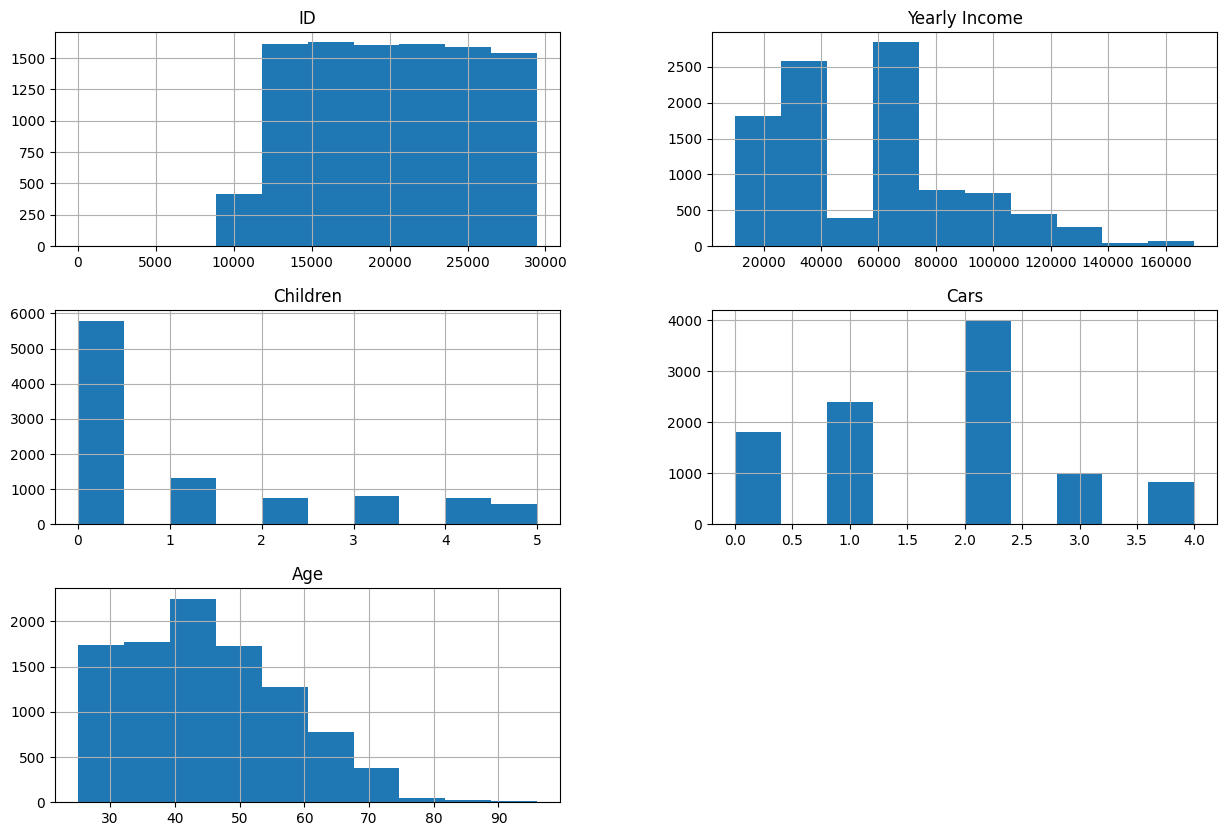

In [ ]:
df.hist()
plt.show()

En una primera instancia, gráficos de este tipo no aportan demasiada información que permita analizar tendencias y patrones estadísticamente, debido a que los mismos no se encuentran limpios. A su vez, se observa que "ID" es registrada como una variable numérica aunque su valor sea arbitrario e irrelevante para el análisis.

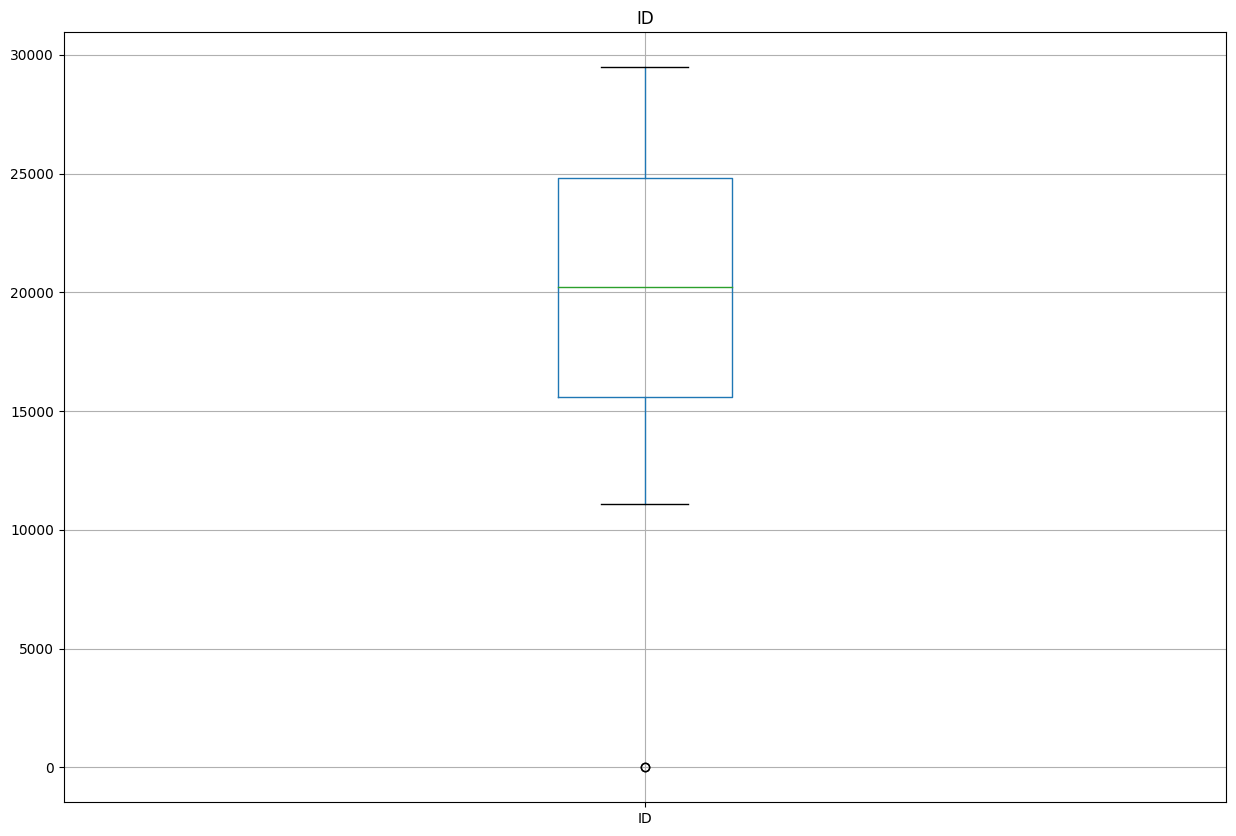

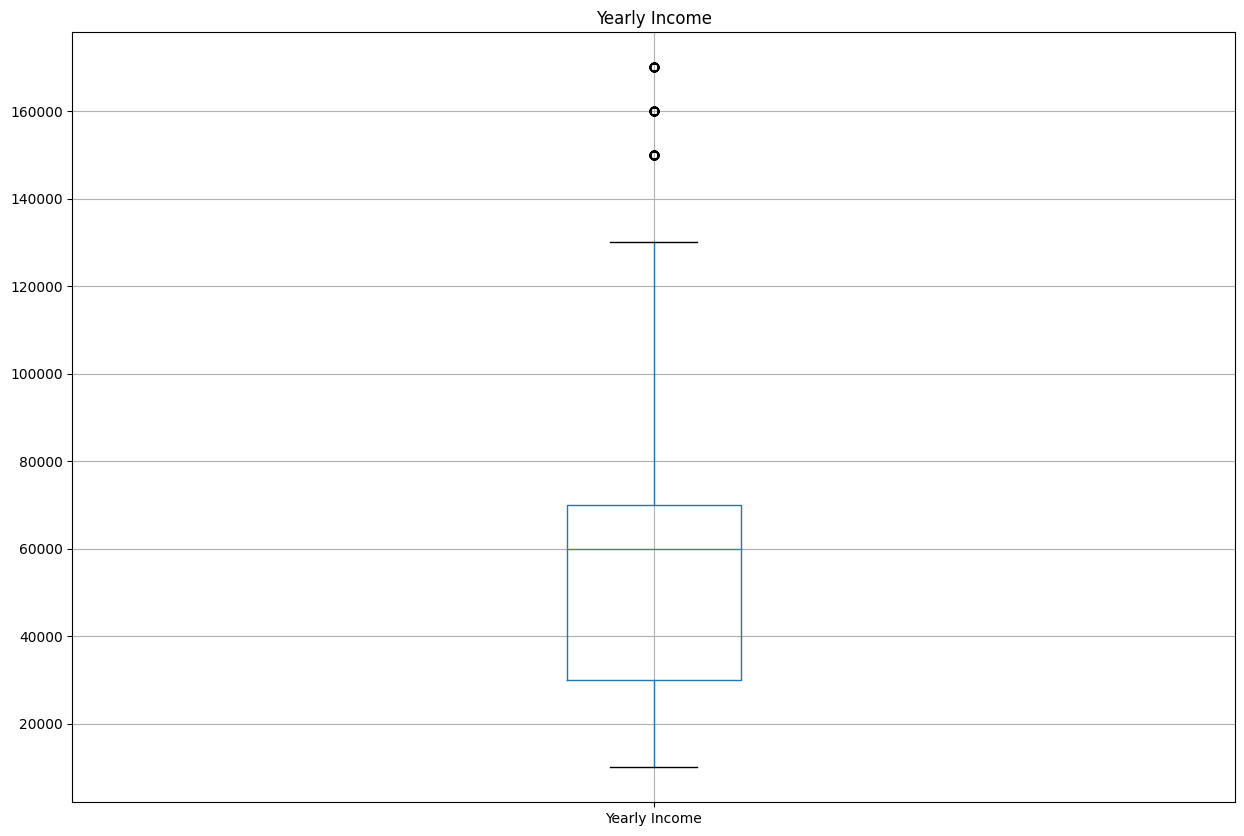

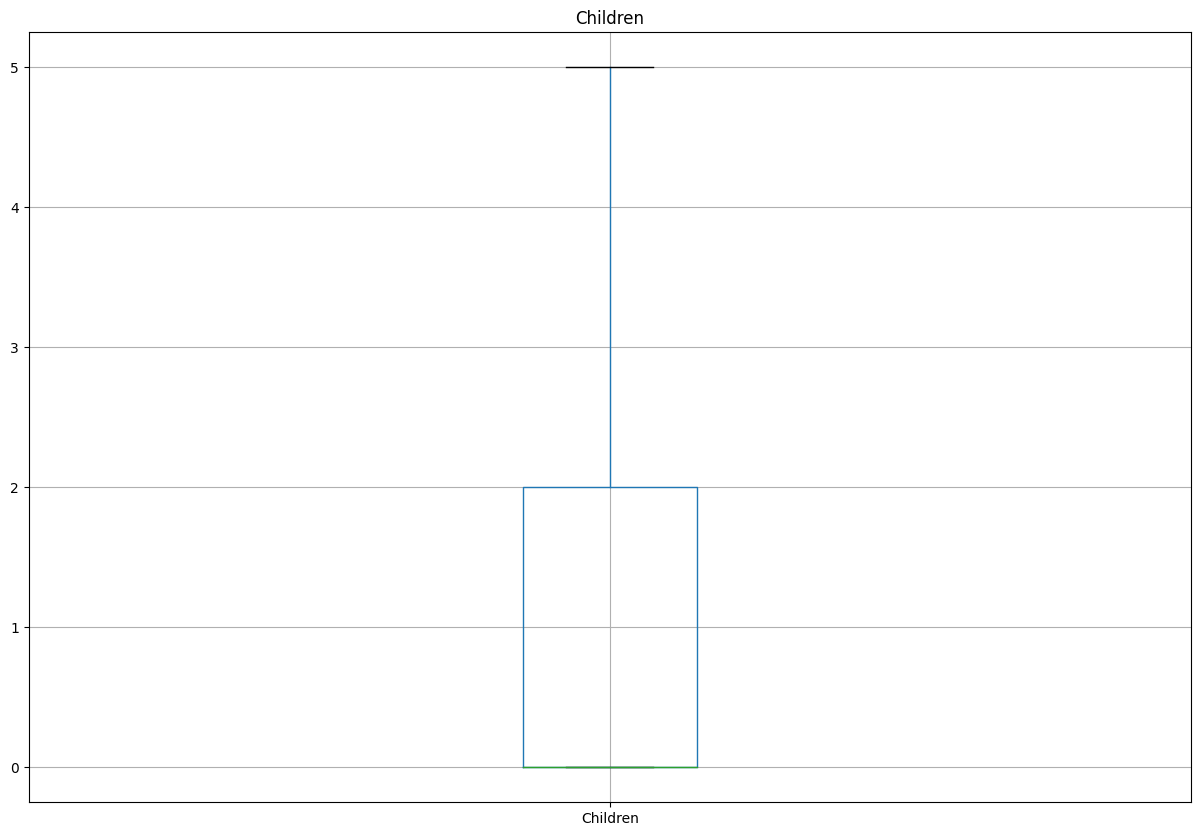

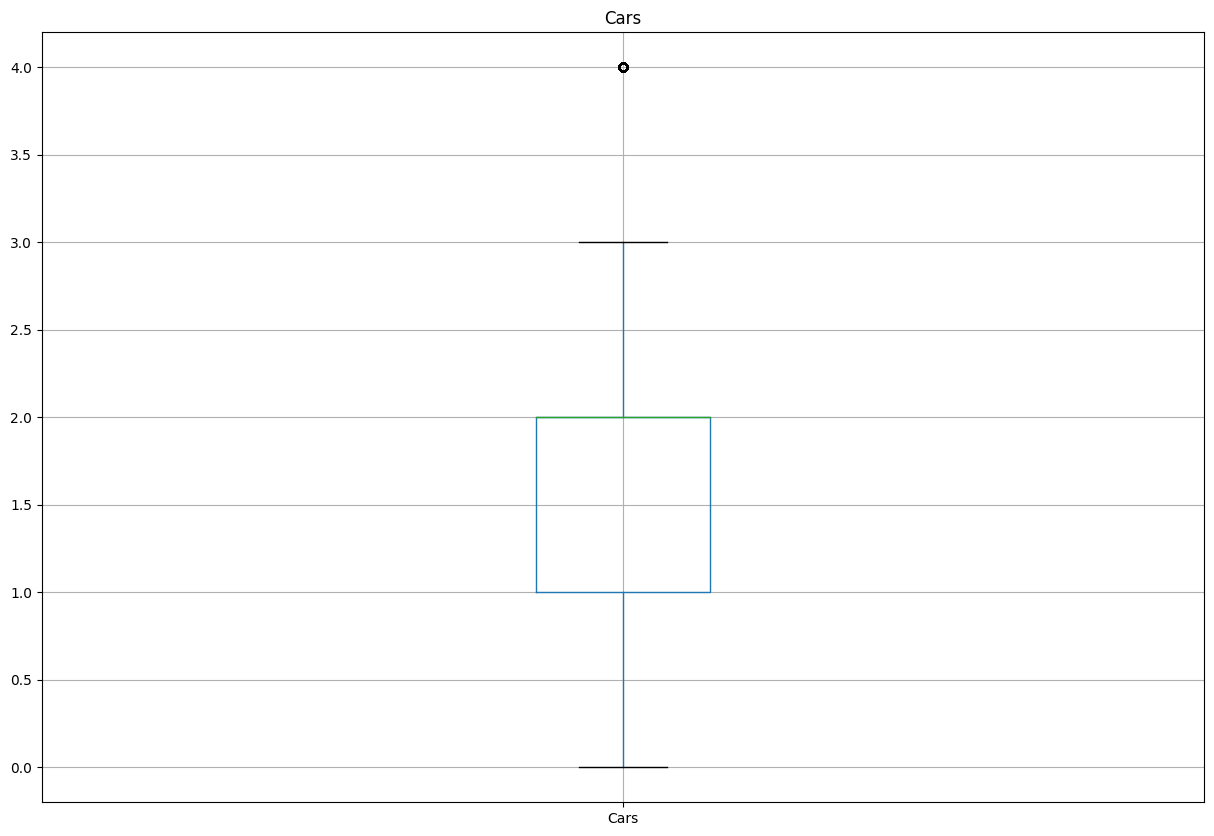

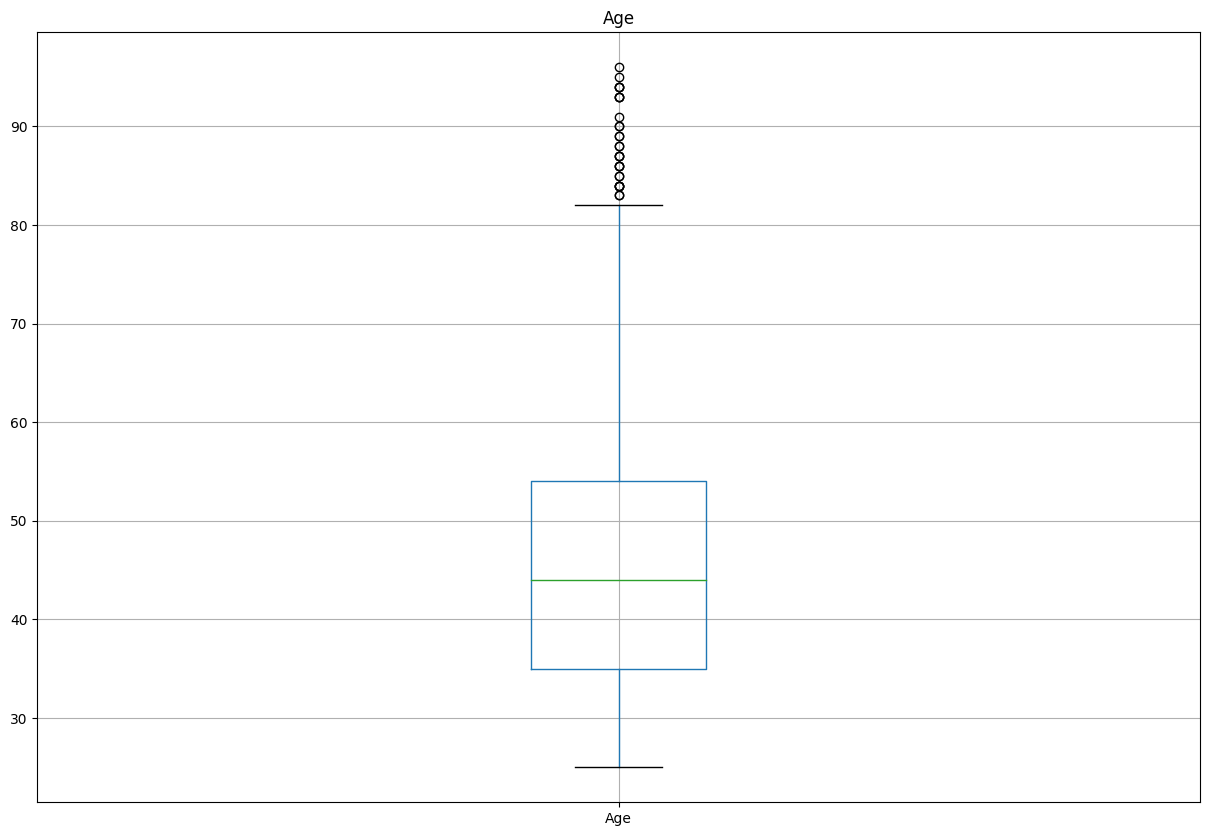

In [ ]:
for column in df.select_dtypes(include=np.number):
  plt.figure()
  df.boxplot(column=[column])
  plt.title(column)
plt.show()

En una primera instancia, gráficos de este tipo no aportan demasiada información que permita analizar tendencias y patrones estadísticamente, debido a que los mismos no se encuentran limpios. A su vez, se observa que "ID" es registrada como una variable numérica aunque su valor sea arbitrario e irrelevante para el análisis.

## Variables Categóricas

In [ ]:
for col in ["ID", "Marital Status", "Gender", "Education", "Occupation", "Home Owner", "Region", "BikeBuyer"]:
    print(df[col].value_counts())

ID
2        1
23241    1
23228    1
23229    1
23235    1
        ..
17131    1
17132    1
17133    1
17134    1
29476    1
Name: count, Length: 10000, dtype: int64
Marital Status
Married    5673
Single     4327
Name: count, dtype: int64
Gender
Male      5113
Female    4887
Name: count, dtype: int64
Education
Partial College        2698
Bachelors              2578
High School            1979
Graduate Degree        1635
Partial High School    1110
Name: count, dtype: int64
Occupation
Professional      2953
Skilled Manual    2495
Management        1730
Clerical          1423
Manual            1399
Name: count, dtype: int64
Home Owner
Yes    6779
No     3221
Name: count, dtype: int64
Region
North America    5456
Europe           2928
Pacific          1616
Name: count, dtype: int64
BikeBuyer
No     9000
Yes    1000
Name: count, dtype: int64


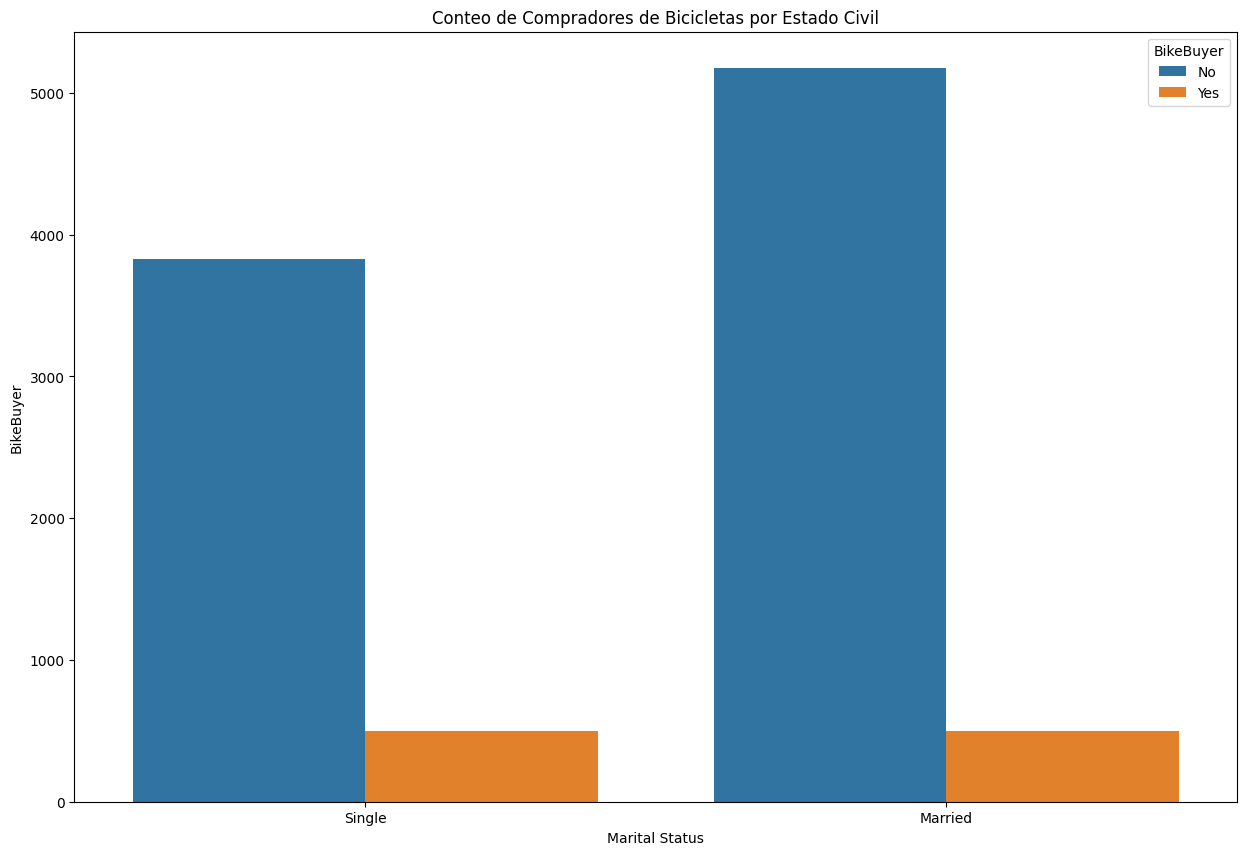

In [ ]:
sns.countplot(x='Marital Status', hue='BikeBuyer', data=df)
plt.title('Conteo de Compradores de Bicicletas por Estado Civil')
plt.xlabel('Marital Status')
plt.ylabel('BikeBuyer')
plt.show()

A simple vista, la diferencia por estado civil entre quienes compran bicicletas no parece ser considerable, aunque esto puede deberse a que quienes cumplen con dicha condición son menos de un quinto del total de casos registrados. Por el contrario, para el caso de los que no lo hacen, aquellos que se encuentran en casados representan una mayor cantidad.

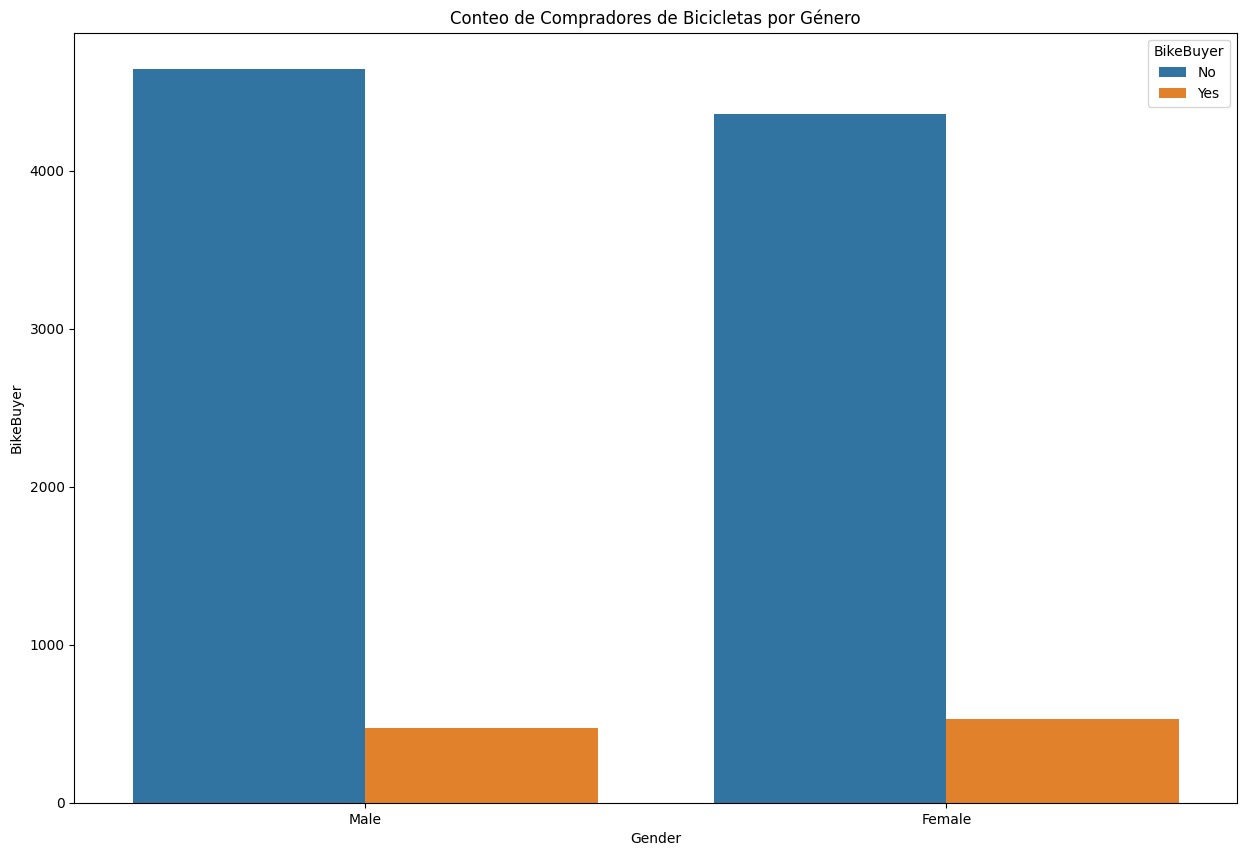

In [ ]:
sns.countplot(x='Gender', hue='BikeBuyer', data=df)
plt.title('Conteo de Compradores de Bicicletas por Género')
plt.xlabel('Gender')
plt.ylabel('BikeBuyer')
plt.show()

A simple vista, se registraron más casos de hombre que no compran bicicletas, que mujeres que no lo hagan. Por el contrario, son más las mujeres que adquieren bicicletas, que los hombres que también lo hicen.

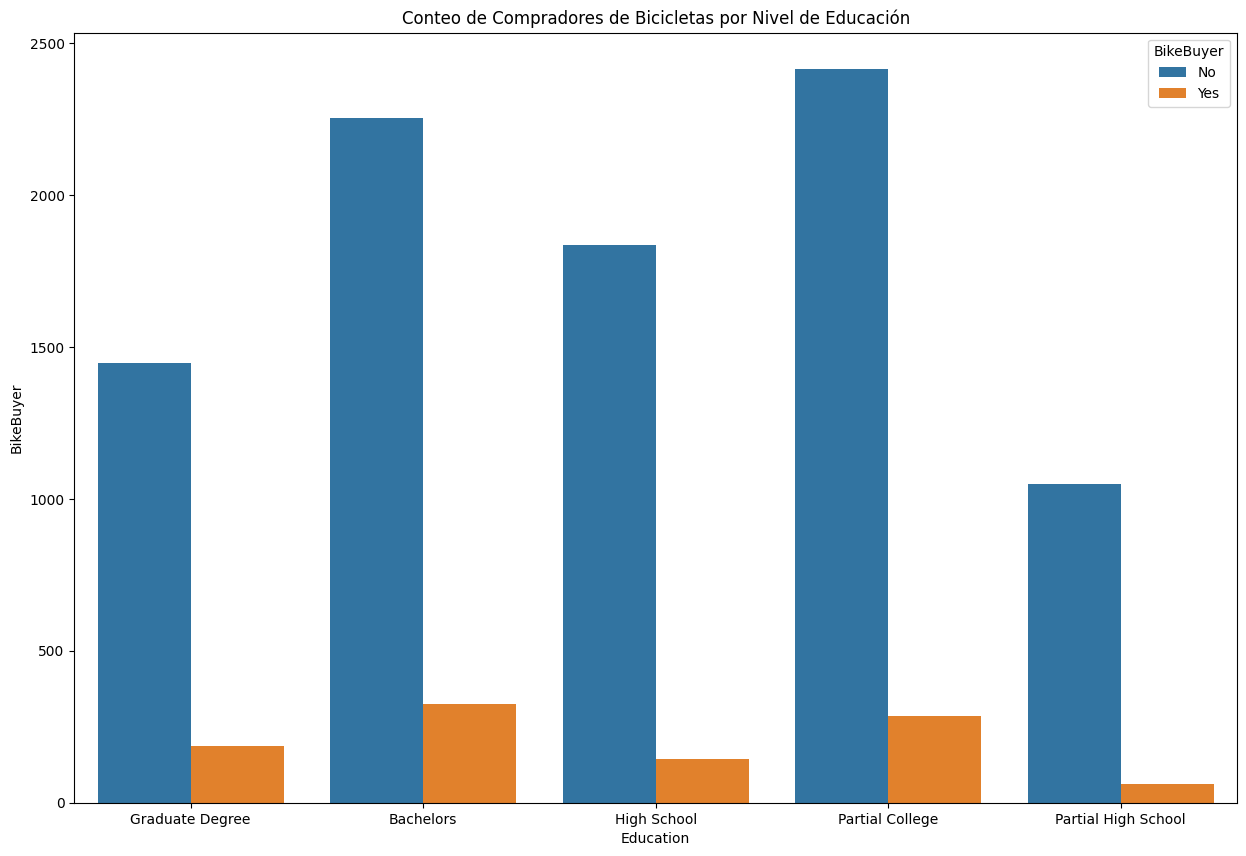

In [ ]:
sns.countplot(x='Education', hue='BikeBuyer', data=df)
plt.title('Conteo de Compradores de Bicicletas por Nivel de Educación')
plt.xlabel('Education')
plt.ylabel('BikeBuyer')
plt.show()

A simple vista, aquellas personas con la asignación "Bachelors", es decir, bachiller, son las que más casos de compra de bicicletas presentan. A su vez, el valor "Partial College" también alcanza valores de conteo mayores a la mayoría de los demás grados de educación, aunque, para dicha variable, la cantidad de registros totales es la mayor de todas, siendo entonces que, en términos porcentuales, la variable "Bachelors" obtiene un porcentaje considerablemente mayor de compradores de bicicletas.

Por otro lado, las variables "Graduate Degree", "Partial College" y "High School" alcanzan cantidades de casos afirmativos para la compra de bicicletas similar menores, pero proporcionales, a sus respectivos conteos de casos negativos.

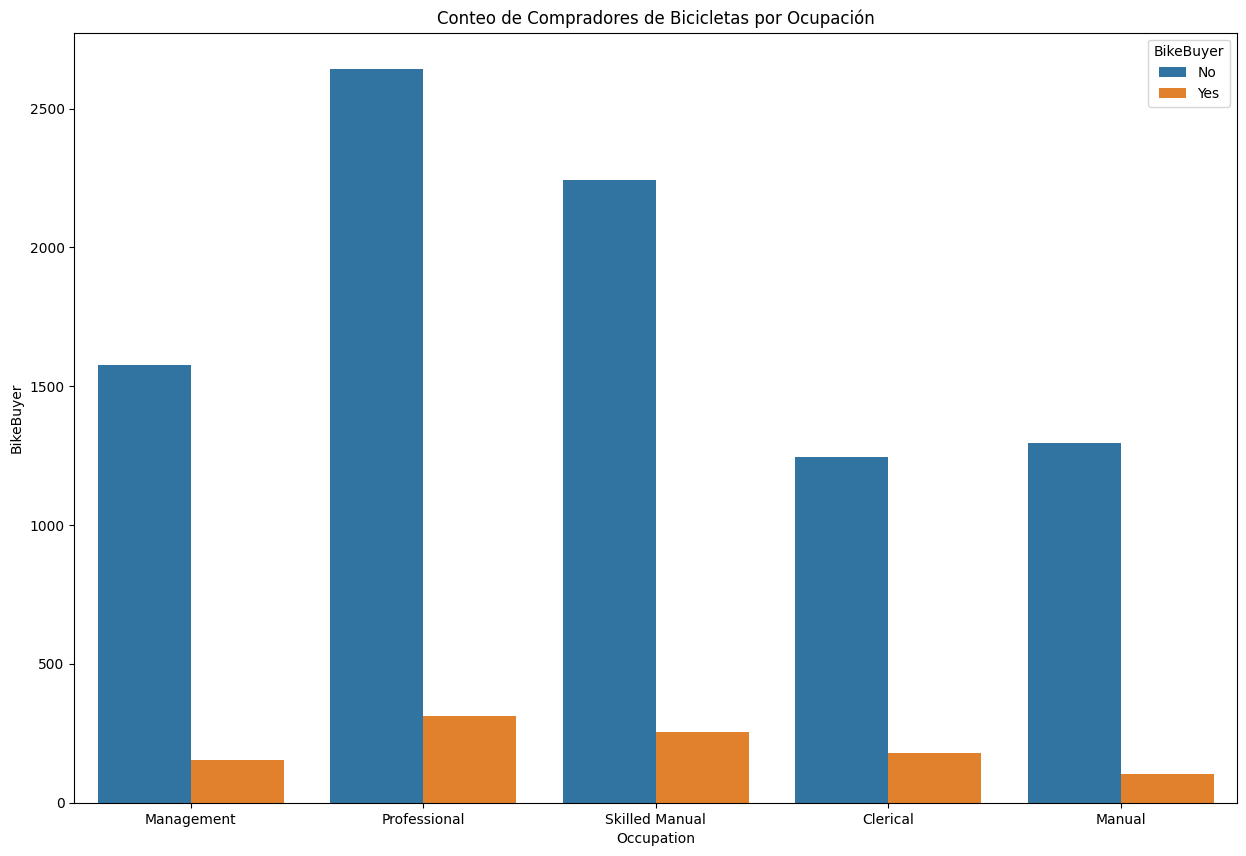

In [ ]:
sns.countplot(x='Occupation', hue='BikeBuyer', data=df)
plt.title('Conteo de Compradores de Bicicletas por Ocupación')
plt.xlabel('Occupation')
plt.ylabel('BikeBuyer')
plt.show()

A simple vista, aquellas ocupaciones con un mayor conteo de casos de compradores de bicicletas son "Professional", "Skilled Manual Occupation", y "Clerical". Sin embargo, vale la pena destacar las dos primeras variables mencionadas son aquellas con una mayor cantidad de casos totales, y, de forma proporcional, también poseen un conteo elevado de casos negativos a la compra de bicicletas, en comparación a las otras 3 ocupaciones. Por último, vale la pena destacar que, en el caso de "Clerical", la proporción de compradores de bicicletas respecto al conteo total para dicha variable, parece ser superior al apreciable para las otras 4.

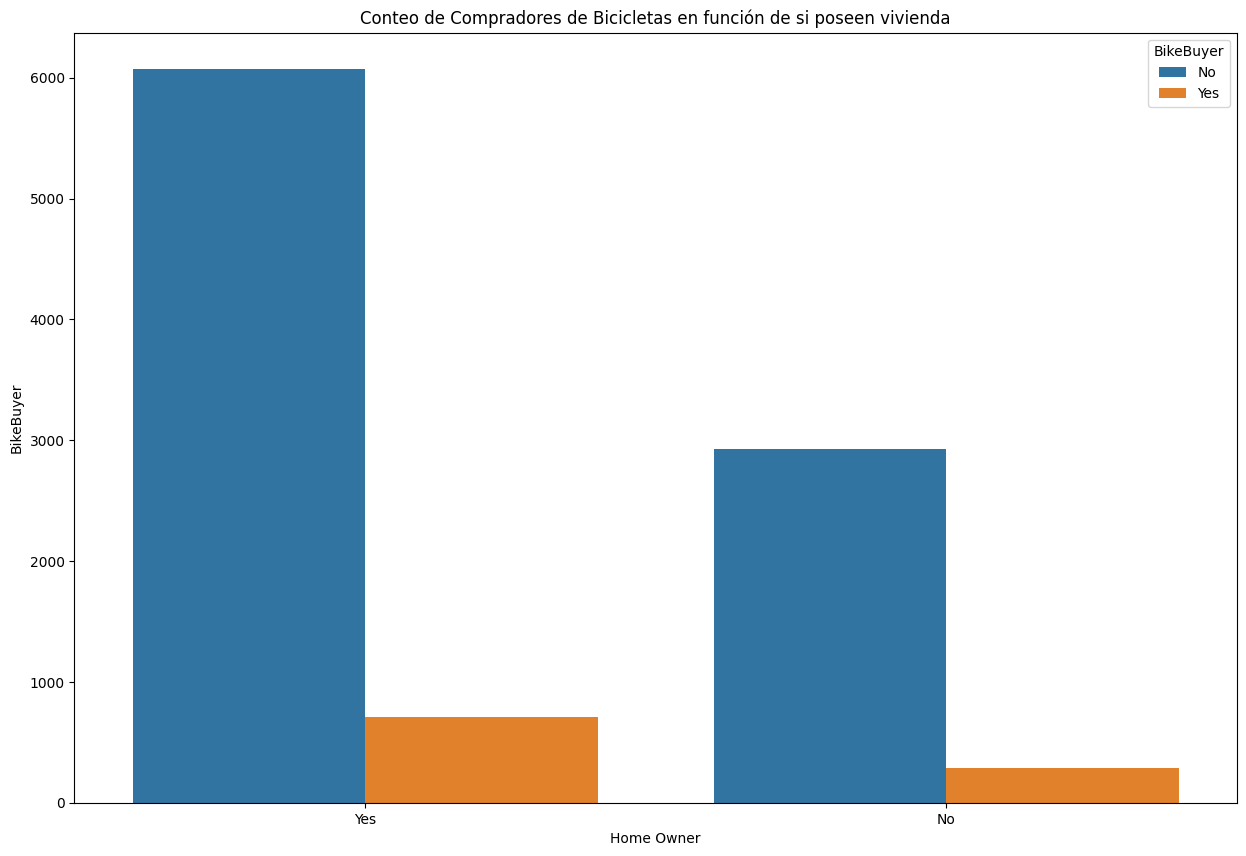

In [ ]:
sns.countplot(x='Home Owner', hue='BikeBuyer', data=df)
plt.title('Conteo de Compradores de Bicicletas en función de si poseen vivienda')
plt.xlabel('Home Owner')
plt.ylabel('BikeBuyer')
plt.show()

En un primer vistazo, la mayor cantidad de compradores de bicicletas se encuentran entre aquellas personas que poseen una vivienda. Sin embargo, vale la pena mencionar que dichos individuos también representan un mayor porcentaje del conteo total. De esta manera, y a modo de una primera aproximación, podría concluirse que es más probable que alguien que compre una bicicleta sea alguien con vivienda propia, pero sin dejar de lado al hecho de que estas personas son, aparentemente, la mayoría de los casos de la población trabajada (suponiendo que la muestra elegida represente adecuadamente la distribución de casos de la población de estudio).

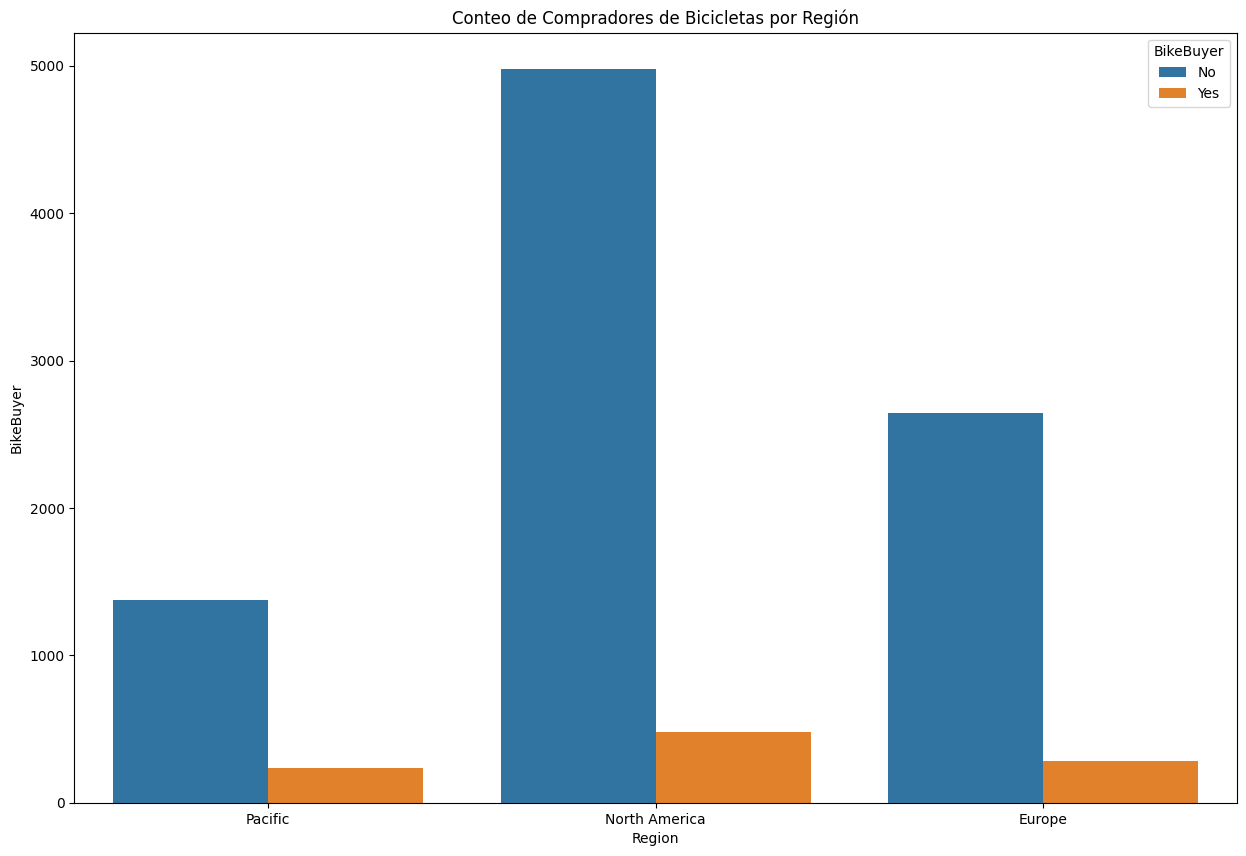

In [ ]:
sns.countplot(x='Region', hue='BikeBuyer', data=df)
plt.title('Conteo de Compradores de Bicicletas por Región')
plt.xlabel('Region')
plt.ylabel('BikeBuyer')
plt.show()

En orden decreciente, las regiones con una mayor cantidad de compradores de bicicletas son América del Norte, Europa, y luego, el Pacífico. Sin embargo, también es cierto qué, para los datos trabajados, los casos registrados en términos cuantitativos siguen un conteo decreciente ordenado de la misma forma. Luego, y a partir de la primera aproximación provista por el gráfico, la cantidad de compradores, sobre el total, parace ser similar para las 3 regiones analizadas.

# Pre-Processing Feature Encoding: Conversión de Variables Categóricas a Numéricas

Para realizar una limpieza de nulos y duplicados, no resulta necesario el preprocesamiento de las variables categóricas, a sus equivalentes numéricas. Sin embargo, para el caso de la detección y eliminación de outliers, resulta conveniente realizar la conversión previamente al filtrado para, de este modo, facilitar el proceso, pudiendo aplicar el mismo método para todas las variables. En otras palabras, se realiza un preprocesado de los datos con feature encoding para poder considerar a todas las variables como numéricas a la hora de proceder con la limpieza y el análisis posterior, aunque dicha práctica suele, en su lugar, ser habitualmente aplicada en instancias de modelado.

In [ ]:
le = LabelEncoder()
for col in ['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Region', 'BikeBuyer']:
    df[col] = le.fit_transform(df[col])

In [ ]:
valores_numericos = {}
for columna in ["Marital Status", "Gender", "Education", "Occupation", "Home Owner", "Region", "BikeBuyer"]:
    valores_unicos = df[columna].unique()
    valores_numericos[columna] = {valor: i for i, valor in enumerate(valores_unicos)}
for columna in ["Marital Status", "Gender", "Education", "Occupation", "Home Owner", "Region", "BikeBuyer"]:
    df[columna] = df[columna].map(valores_numericos[columna])
print(df.head())

      ID  Marital Status  Gender  Yearly Income  Children  Education  \
0      2               0       0         160000         0          0   
1      4               1       1         120000         2          1   
2  11085               0       1          60000         0          2   
3  11087               1       1          70000         2          3   
4  11091               1       0          90000         0          3   

   Occupation  Home Owner  Cars Commute Distance  Region  Age  BikeBuyer  
0           0           0     2        0-1 Miles       0   47          0  
1           0           0     3        2-5 Miles       1   40          0  
2           1           1     2       5-10 Miles       1   49          0  
3           1           1     0        0-1 Miles       1   49          0  
4           1           0     1       5-10 Miles       1   49          0  


Una vez ya convertidas las variables categóricas en contenedoras de datos numéricos, se procede a realizar el filtrado de datos nulos y duplicado.

# Limpieza de Datos Nulos y Duplicados

Antes de comenzar a análizar los datos por medio de herramientas de exploración estadística, resulta conveniente realizar lo que se conoce como una "limpieza de datos". La misma consiste en la eliminación de filas repetidas, valores nulos, y todas aquellas inconsistencias en el Data Set, que pudieran llevar a la obtención de resultados, predicciones y conclusiones, que posean una menor fiabilidad. A su vez, para facilitar el análisis posterior, se asigna a la variable "ID" el tipo de dato string.

In [ ]:
df['ID'] = df['ID'].astype(str)

## Nulos

In [ ]:
print (df.isnull().sum())

ID                  0
Marital Status      0
Gender              0
Yearly Income       0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
BikeBuyer           0
dtype: int64


In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols = numeric_cols.drop('ID', errors='ignore')
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

En función de la utilización de herramientas de reconocimiento de valores nulos, se determina que no es necesario descartar ninguno de los casos registrados.

## Duplicados

In [ ]:
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())

0
0


Se analiza la posible existencia de valores duplicados para todas las columnas del Data Set, así como particularmente para la columna "ID", dando como resultado la determinación de que no existen filas a descartar.

# Limpieza de Outliers

Se evaluan los Outliers para cada una de las variables numéricas que corresponden a columnas del Data Set. A modo de aclaración, la columna denominada "ID" no se considera como una variable numérica, dado que su valor corresponde a una asignación que permite identificar a cada individuo, pero que no posee un valor estadístico relevante para el análisis.

### "Marital Status"

Para la variable "Marital Status", al poseer unicamente dos alternativas de valor posible, siguiendo una asignación de tipo "Married or Single", se considera innecesario realizar un filtrado de Outliers.

### "Gender"

Para la variable "Gender", al poseer unicamente dos alternativas de valor posible, siguiendo una asignación de tipo "Male or Female", se considera innecesario realizar un filtrado de Outliers.

### "Yearly Income"

In [ ]:
Q1 = df['Yearly Income'].quantile(0.25)
Q3 = df['Yearly Income'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Yearly Income'] < (Q1 - 1.5 * IQR)) | (df['Yearly Income'] > (Q3 + 1.5 * IQR)))]

### "Children"

In [ ]:
Q1 = df['Children'].quantile(0.25)
Q3 = df['Children'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Children'] < (Q1 - 1.5 * IQR)) | (df['Children'] > (Q3 + 1.5 * IQR)))]

### "Education"

In [ ]:
df['Education'] = pd.to_numeric(df['Education'], errors='coerce')
Q1 = df['Education'].quantile(0.25)
Q3 = df['Education'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Education'] < (Q1 - 1.5 * IQR)) | (df['Education'] > (Q3 + 1.5 * IQR)))]

### "Occupation"

In [ ]:
df['Occupation'] = pd.to_numeric(df['Occupation'], errors='coerce')
Q1 = df['Occupation'].quantile(0.25)
Q3 = df['Occupation'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Occupation'] < (Q1 - 1.5 * IQR)) | (df['Occupation'] > (Q3 + 1.5 * IQR)))]

### "Home Owner"

Para la variable "Home Owner", al poseer unicamente dos alternativas de valor posible, siguiendo una asignación de tipo "sí o no", se considera innecesario realizar un filtrado de Outliers.

### "Cars"

In [ ]:
Q1 = df['Cars'].quantile(0.25)
Q3 = df['Cars'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Cars'] < (Q1 - 1.5 * IQR)) | (df['Cars'] > (Q3 + 1.5 * IQR)))]

### "Commute Distance"

Para la evaluación de esta columna se realizan algunos ajustes. Cada uno de los datos está establecido como un rango entre dos números, seguidos de la palabra "Miles", correspondiente a la unidad de distancia. Luego, para poder entender la variable "Commute Distance" como numérica, se procede de la siguiente manera: En primer lugar, se elimina la palabra Miles de cada uno de los valores. A continuación, se promedia cada uno de los valores extremos de los rangos disponibles, estableciendo el resultado de cada celda como un float. De este modo se obtiene, para cada uno los casos, un valor numérico estimado que corresponde al punto intermedio del rango establecido. Por último, para aquellos valores que estaban explicitados como "10+", se elimina el carácter "+", para permitir la evaluación del "10" como un número.

In [ ]:
df['Commute Distance'] = df['Commute Distance'].str.replace(' Miles', '')
df['Commute Distance'] = df['Commute Distance'].apply(lambda x: (float(x.split('-')[0]) + float(x.split('-')[1])) / 2 if '-' in x else (float(x.strip('+')) if '+' in x else float(x)))

<ipython-input-30-91077cda00e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Commute Distance'] = df['Commute Distance'].str.replace(' Miles', '')
<ipython-input-30-91077cda00e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Commute Distance'] = df['Commute Distance'].apply(lambda x: (float(x.split('-')[0]) + float(x.split('-')[1])) / 2 if '-' in x else (float(x.strip('+')) if '+' in x else float(x)))


In [ ]:
Q1 = df['Commute Distance'].quantile(0.25)
Q3 = df['Commute Distance'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Commute Distance'] < (Q1 - 1.5 * IQR)) | (df['Commute Distance'] > (Q3 + 1.5 * IQR)))]

### "Region"

In [ ]:
df['Region'] = pd.to_numeric(df['Region'], errors='coerce')
Q1 = df['Region'].quantile(0.25)
Q3 = df['Region'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Region'] < (Q1 - 1.5 * IQR)) | (df['Region'] > (Q3 + 1.5 * IQR)))]

### "Age"

In [ ]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR)))]

### "BikeBuyer"

Para la variable "BikeBuyer", al poseer unicamente dos alternativas de valor posible, siguiendo una asignación de tipo "sí o no", se considera innecesario realizar un filtrado de Outliers.

# Processing Feature Scaling: Normalización o Escalado

In [ ]:
print(df.shape)

(9104, 13)


Una vez que se eliminan aquellos valores que se decide descartar, quedando un total de 9104 filas restantes, resulta conveniente realizar un escalado de todos los datos correspondientes a variables numéricas, para poder evaluarlos en conjunto. Si bien suele llevarse a cabo una estandarización entre los valores (-1;1), se considera el rango (0;1) para de este modo poder realizar feature selection mediante un método que no admite la incorporación de números negativos.

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols = numeric_cols.drop('ID', errors='ignore')
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Processing Feature Selection: Análisis Estadístico

Considerando que el siguiente paso es evaluar las relaciones entre las variables para finalizar el procesado de los datos con feature selection, resulta conveniente analizar estadísticamente el resultado de la limpieza. El primer filtro de feature selection es la eliminación de variables constantes o semiconstantes.

In [ ]:
df.describe()

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,BikeBuyer
count,9104.000000,9104.000000,9104.000000,9104.000000,9104.000000,9104.000000,9104.000000,9104.000000,9104.000000,9104.000000,9104.000000,9104.000000
mean,0.558985,0.488357,0.341883,0.186951,0.478773,0.472237,0.321507,0.483560,0.361362,0.566509,0.361917,0.102482
std,0.496536,0.499892,0.225365,0.293211,0.320418,0.317419,0.467081,0.308197,0.375286,0.321170,0.217690,0.303298
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.166667,0.000000,0.250000,0.250000,0.000000,0.333333,0.000000,0.500000,0.181818,0.000000
50%,1.000000,0.000000,0.333333,0.000000,0.500000,0.500000,0.000000,0.666667,0.105263,0.500000,0.345455,0.000000
75%,1.000000,1.000000,0.500000,0.200000,0.750000,0.750000,1.000000,0.666667,0.736842,1.000000,0.509091,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols = numeric_cols.drop('ID', errors='ignore')
variances = df[numeric_cols].var()
threshold = 0.01
low_variance_features = variances[variances < threshold].index
print("Eliminando las siguientes variables de baja varianza:")
for feature in low_variance_features:
    print(feature)
df = df.drop(low_variance_features, axis=1)

Eliminando las siguientes variables de baja varianza:


Dado que ninguna variable se considera constante o semi-constante, no se descarta ninguna columna. En función de los datos descriptos, se evalúa para cada variable su posible relación con la compra de bicicletas mediante test de hipótesis utilizando pruebas de tipo chi-cuadrado, dado que la variable de interés originalmente se clasifica como categórica (independientemente del proceso del feature enconding).

## "Marital Status"

BikeBuyer        0.0  1.0
Marital Status           
0.0             3543  472
1.0             4628  461


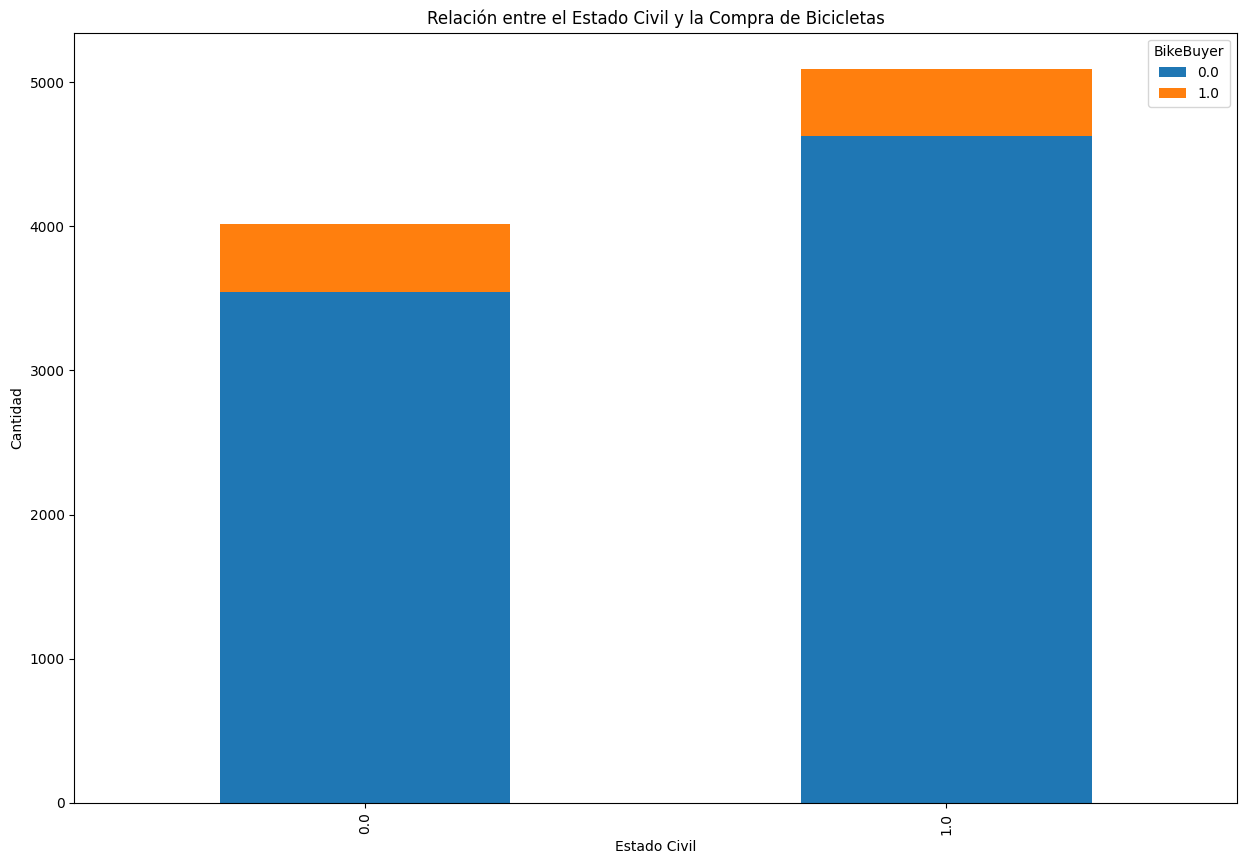

Valor de chi-cuadrado: 17.458337643886097
Valor p: 2.936734265731355e-05
Hay evidencia estadística para rechazar la hipótesis nula de independencia.
El estado civil y la compra de bicicleta parecen estar relacionados.


In [ ]:
tabla_contingencia = pd.crosstab(df['Marital Status'], df['BikeBuyer'])
print(tabla_contingencia)
tabla_contingencia.plot(kind='bar', stacked=True)
plt.title('Relación entre el Estado Civil y la Compra de Bicicletas')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad')
plt.show()
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print(f"Valor de chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
if p < 0.05:
    print("Hay evidencia estadística para rechazar la hipótesis nula de independencia.")
    print("El estado civil y la compra de bicicleta parecen estar relacionados.")
else:
    print("No hay suficiente evidencia estadística para rechazar la hipótesis nula de independencia.")
    print("El estado civil y la compra de bicicleta parecen ser independientes.")

Se rechaza independencia, y se considera que ambas variables poseen aparente relación.

## "Gender"

BikeBuyer   0.0  1.0
Gender              
0.0        4222  436
1.0        3949  497


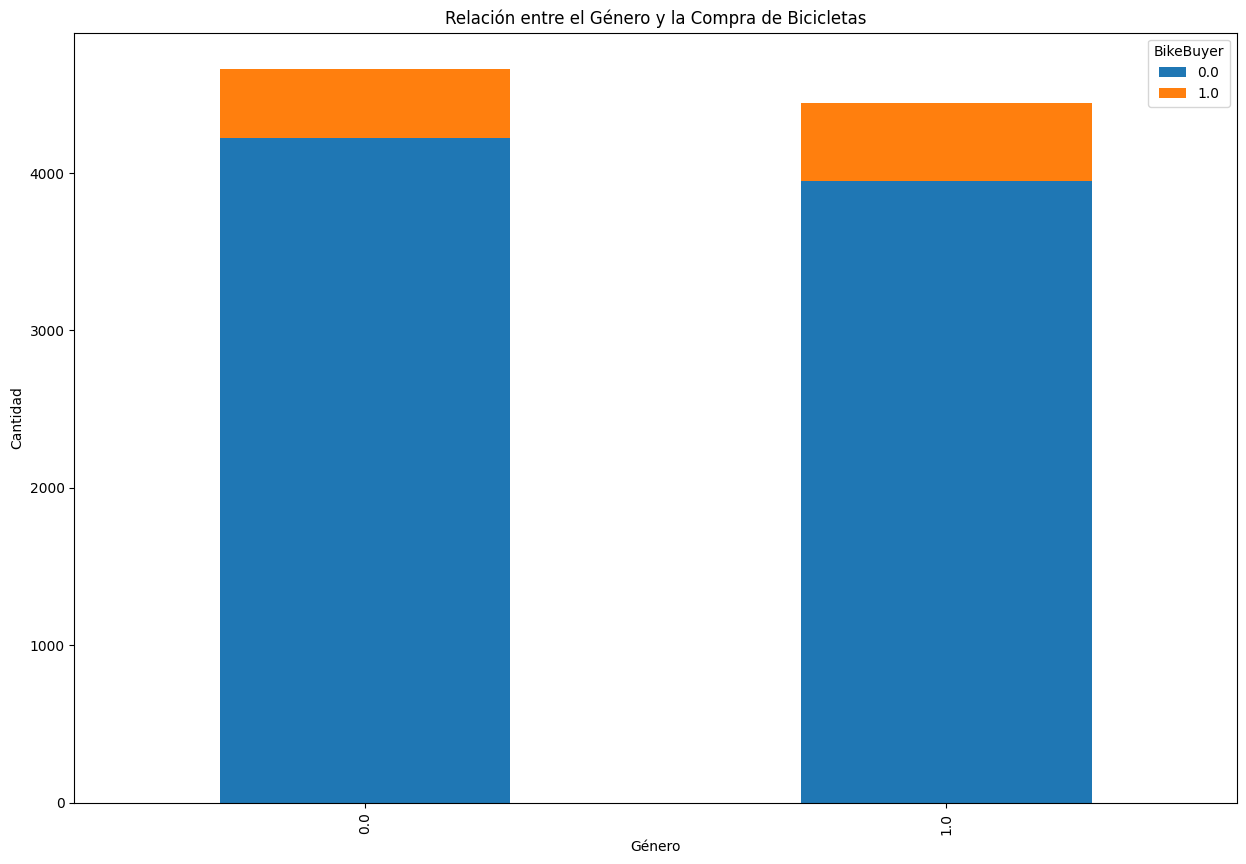

Valor de chi-cuadrado: 7.980578236321721
Valor p: 0.004728183737043371
Hay evidencia estadística para rechazar la hipótesis nula de independencia.
El género y la compra de bicicletas parecen estar relacionados.


In [ ]:
tabla_contingencia = pd.crosstab(df['Gender'], df['BikeBuyer'])
print(tabla_contingencia)
tabla_contingencia.plot(kind='bar', stacked=True)
plt.title('Relación entre el Género y la Compra de Bicicletas')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print(f"Valor de chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
if p < 0.05:
    print("Hay evidencia estadística para rechazar la hipótesis nula de independencia.")
    print("El género y la compra de bicicletas parecen estar relacionados.")
else:
    print("No hay suficiente evidencia estadística para rechazar la hipótesis nula de independencia.")
    print("El género y la compra de bicicletas parecen ser independientes.")

Se rechaza independencia, y se considera que ambas variables poseen aparente relación.

## "Yearly Income"

BikeBuyer       0.0  1.0
Yearly Income           
0.000000        675   47
0.083333        977   82
0.166667       1084  110
0.250000       1218  159
0.333333        343   44
0.416667       1467  180
0.500000        966  142
0.583333        628   67
0.666667        332   49
0.750000        198   10
0.833333        128   13
0.916667         69    5
1.000000         86   25


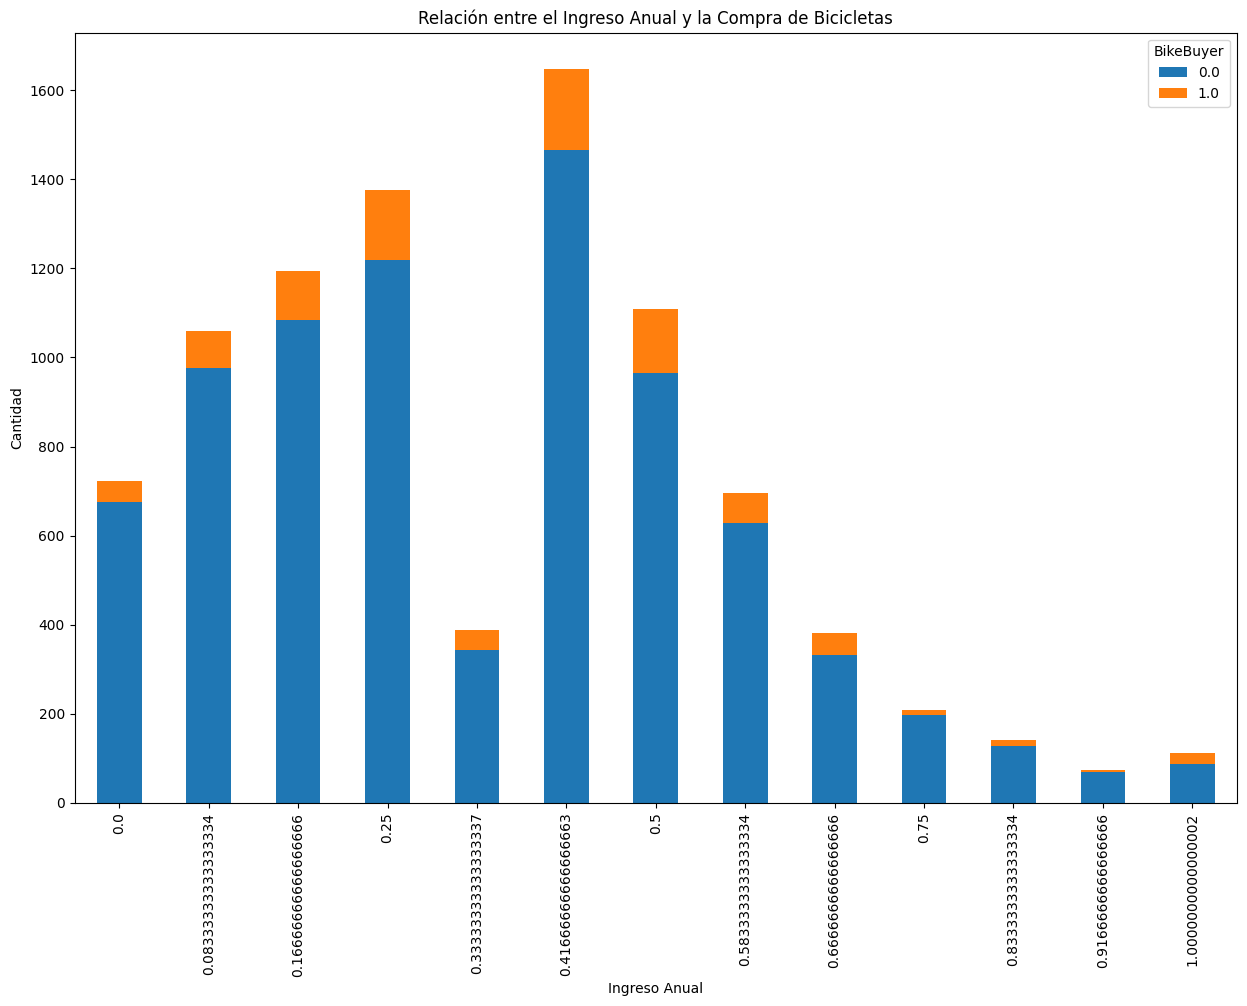

Valor de chi-cuadrado: 60.53766614937702
Valor p: 1.8009895724702236e-08
Hay evidencia estadística para rechazar la hipótesis nula de independencia.
El ingreso anual y la compra de bicicletas parecen estar relacionados.


In [ ]:
tabla_contingencia = pd.crosstab(df['Yearly Income'], df['BikeBuyer'])
print(tabla_contingencia)
tabla_contingencia.plot(kind='bar', stacked=True)
plt.title('Relación entre el Ingreso Anual y la Compra de Bicicletas')
plt.xlabel('Ingreso Anual')
plt.ylabel('Cantidad')
plt.show()
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print(f"Valor de chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
if p < 0.05:
    print("Hay evidencia estadística para rechazar la hipótesis nula de independencia.")
    print("El ingreso anual y la compra de bicicletas parecen estar relacionados.")
else:
    print("No hay suficiente evidencia estadística para rechazar la hipótesis nula de independencia.")
    print("El ingreso anual y la compra de bicicletas parecen ser independientes.")

Se rechaza independencia, y se considera que ambas variables poseen aparente relación.

## "Children"

BikeBuyer   0.0  1.0
Children            
0.0        5032  623
0.2        1104  118
0.4         555   97
0.6         629   38
0.8         524   33
1.0         327   24


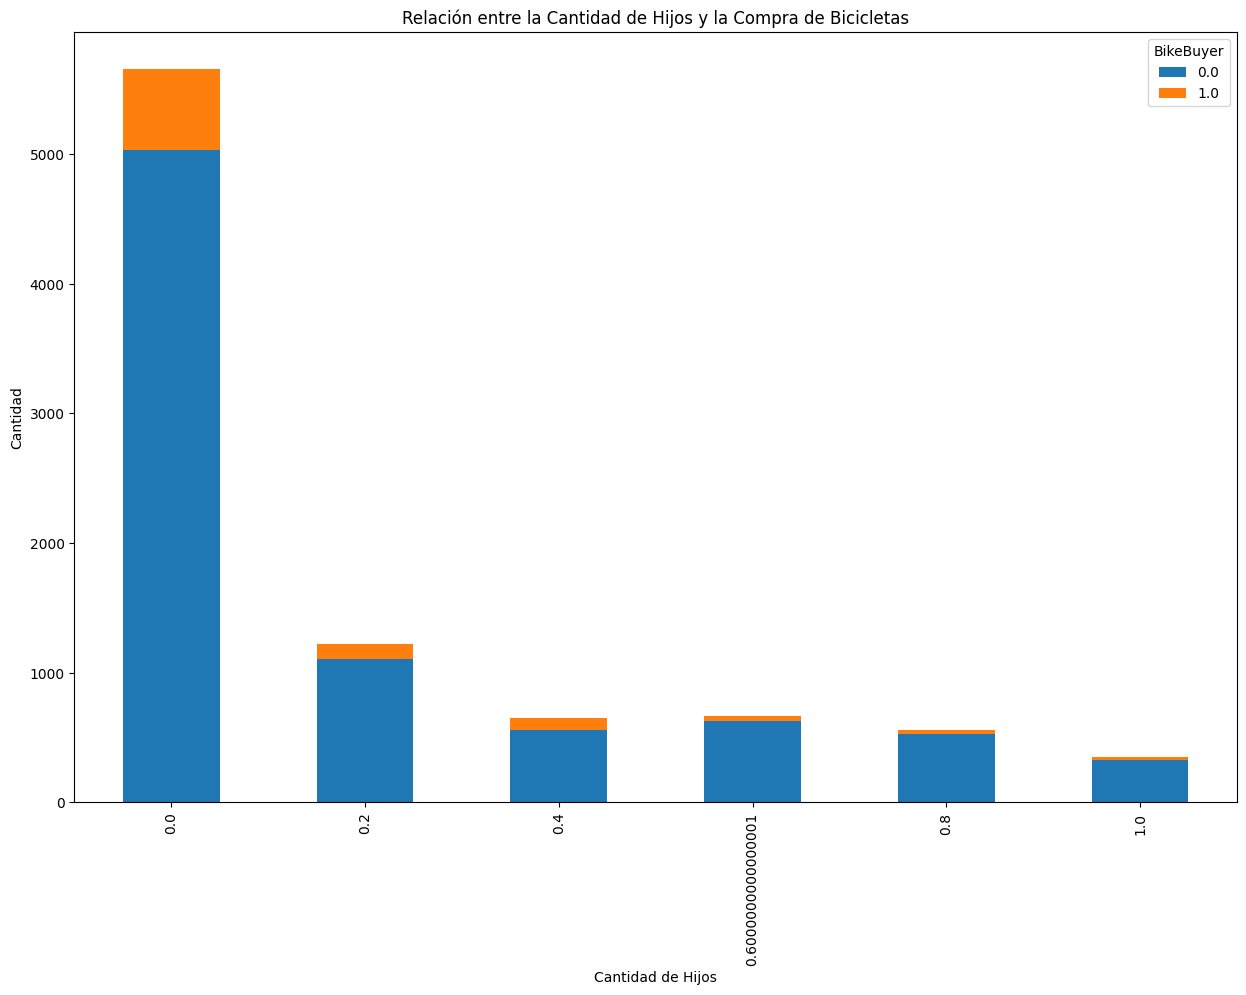

Valor de chi-cuadrado: 50.06571788668712
Valor p: 1.3435426075999168e-09
Hay evidencia estadística para rechazar la hipótesis nula de independencia.
La cantidad de hijos y la compra de bicicletas parecen estar relacionados.


In [ ]:
tabla_contingencia = pd.crosstab(df['Children'], df['BikeBuyer'])
print(tabla_contingencia)
tabla_contingencia.plot(kind='bar', stacked=True)
plt.title('Relación entre la Cantidad de Hijos y la Compra de Bicicletas')
plt.xlabel('Cantidad de Hijos')
plt.ylabel('Cantidad')
plt.show()
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print(f"Valor de chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
if p < 0.05:
    print("Hay evidencia estadística para rechazar la hipótesis nula de independencia.")
    print("La cantidad de hijos y la compra de bicicletas parecen estar relacionados.")
else:
    print("No hay suficiente evidencia estadística para rechazar la hipótesis nula de independencia.")
    print("La cantidad de hijos y la compra de bicicletas parecen ser independientes.")

Se rechaza independencia, y se considera que ambas variables poseen aparente relación.

## "Education"

BikeBuyer   0.0  1.0
Education           
0.00       1377  185
0.25       1891  300
0.50       1697  131
0.75       2234  270
1.00        972   47


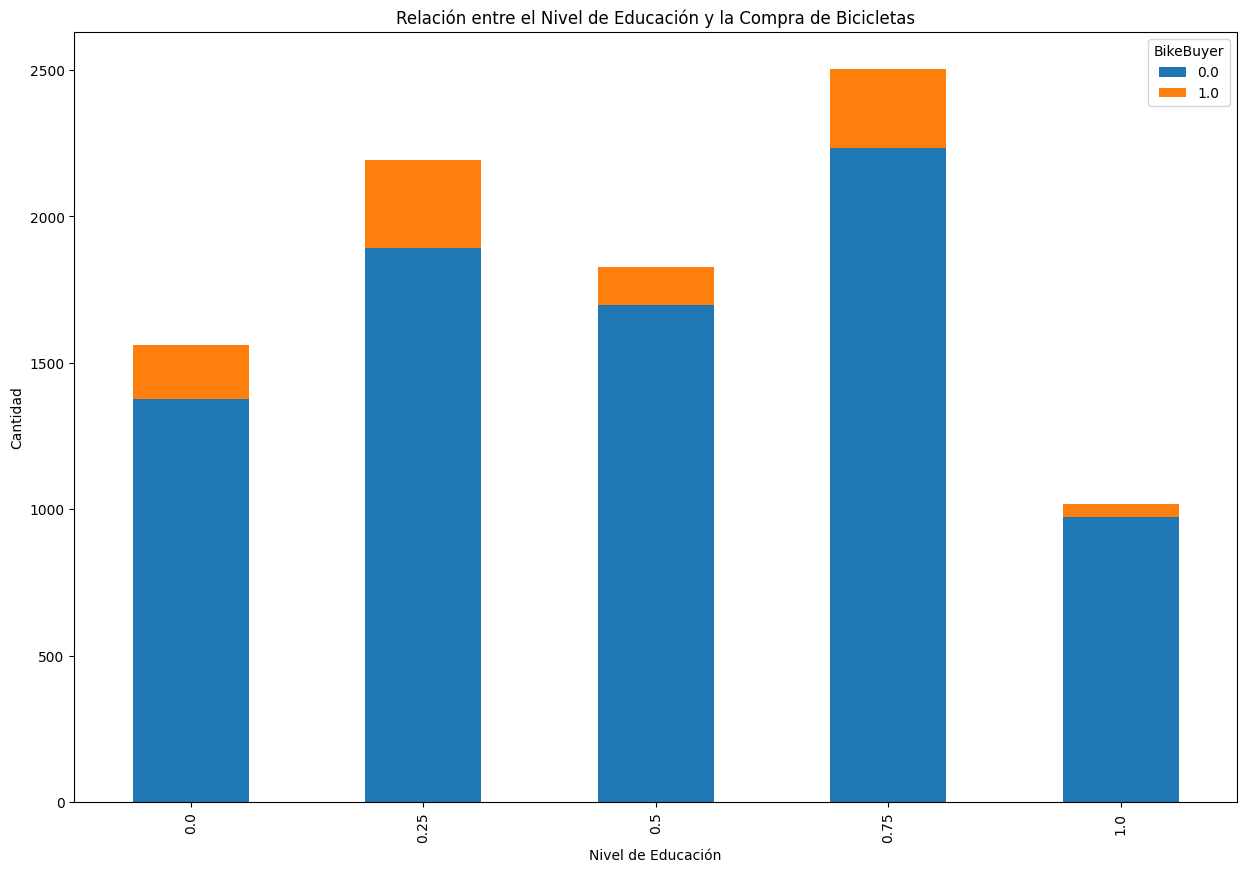

Valor de chi-cuadrado: 87.42278272712045
Valor p: 4.643036729971822e-18
Hay evidencia estadística para rechazar la hipótesis nula de independencia.
El nivel de educación y la compra de bicicletas parecen estar relacionados.


In [ ]:
tabla_contingencia = pd.crosstab(df['Education'], df['BikeBuyer'])
print(tabla_contingencia)
tabla_contingencia.plot(kind='bar', stacked=True)
plt.title('Relación entre el Nivel de Educación y la Compra de Bicicletas')
plt.xlabel('Nivel de Educación')
plt.ylabel('Cantidad')
plt.show()
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print(f"Valor de chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
if p < 0.05:
    print("Hay evidencia estadística para rechazar la hipótesis nula de independencia.")
    print("El nivel de educación y la compra de bicicletas parecen estar relacionados.")
else:
    print("No hay suficiente evidencia estadística para rechazar la hipótesis nula de independencia.")
    print("El nivel de educación y la compra de bicicletas parecen ser independientes.")

Se rechaza independencia, y se considera que ambas variables poseen aparente relación.

## "Occupation"

BikeBuyer    0.0  1.0
Occupation           
0.00        1213  124
0.25        2232  274
0.50        2221  253
0.75        1226  179
1.00        1279  103


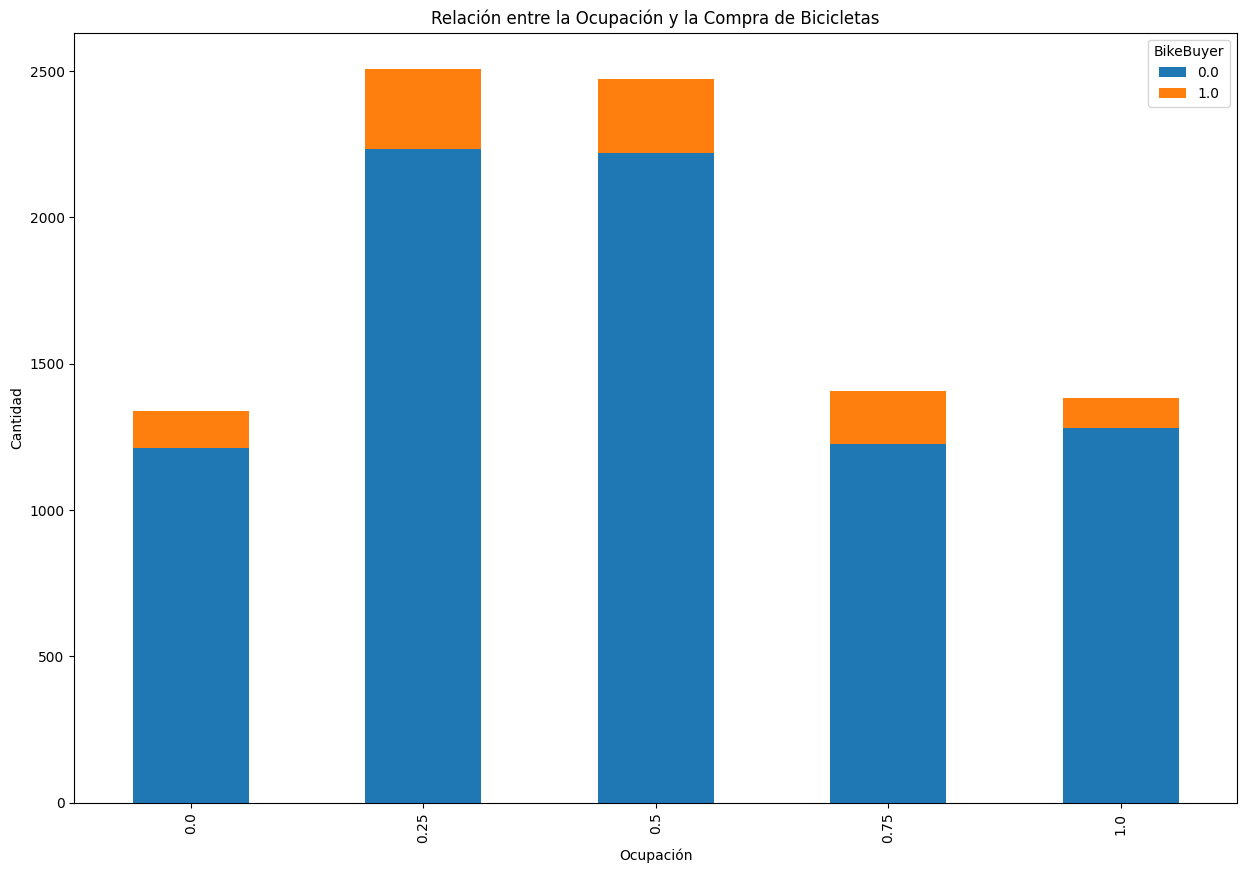

Valor de chi-cuadrado: 23.88551662393126
Valor p: 8.420789435362245e-05
Hay evidencia estadística para rechazar la hipótesis nula de independencia.
La ocupación y la compra de bicicletas parecen estar relacionados.


In [ ]:
tabla_contingencia = pd.crosstab(df['Occupation'], df['BikeBuyer'])
print(tabla_contingencia)
tabla_contingencia.plot(kind='bar', stacked=True)
plt.title('Relación entre la Ocupación y la Compra de Bicicletas')
plt.xlabel('Ocupación')
plt.ylabel('Cantidad')
plt.show()
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print(f"Valor de chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
if p < 0.05:
    print("Hay evidencia estadística para rechazar la hipótesis nula de independencia.")
    print("La ocupación y la compra de bicicletas parecen estar relacionados.")
else:
    print("No hay suficiente evidencia estadística para rechazar la hipótesis nula de independencia.")
    print("La ocupación y la compra de bicicletas parecen ser independientes.")

Se rechaza independencia, y se considera que ambas variables poseen aparente relación.

## "Home Owner"

BikeBuyer    0.0  1.0
Home Owner           
0.0         5522  655
1.0         2649  278


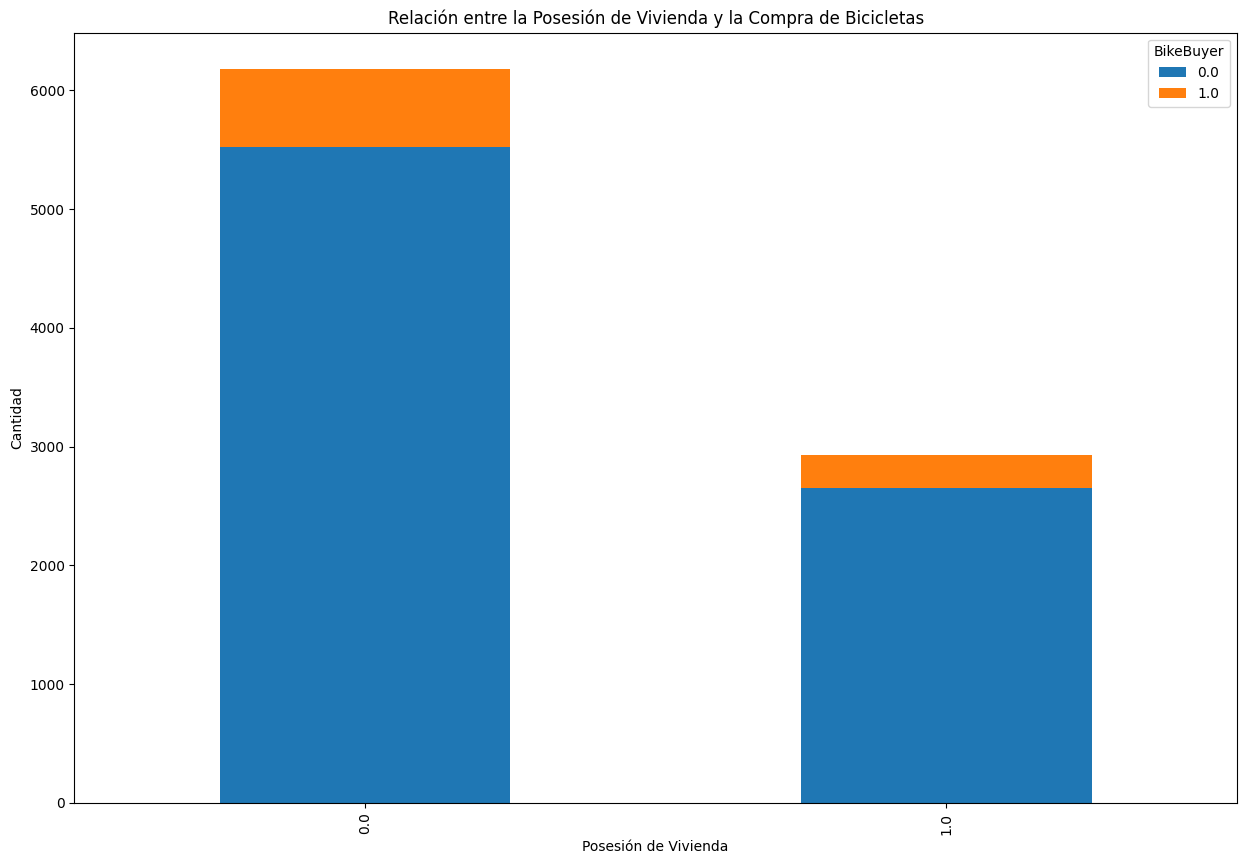

Valor de chi-cuadrado: 2.5225756629755756
Valor p: 0.11222714329650346
No hay suficiente evidencia estadística para rechazar la hipótesis nula de independencia.
La posesión de vivienda y la compra de bicicletas parecen ser independientes.


In [ ]:
tabla_contingencia = pd.crosstab(df['Home Owner'], df['BikeBuyer'])
print(tabla_contingencia)
tabla_contingencia.plot(kind='bar', stacked=True)
plt.title('Relación entre la Posesión de Vivienda y la Compra de Bicicletas')
plt.xlabel('Posesión de Vivienda')
plt.ylabel('Cantidad')
plt.show()
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print(f"Valor de chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
if p < 0.05:
    print("Hay evidencia estadística para rechazar la hipótesis nula de independencia.")
    print("La posesión de vivienda y la compra de bicicletas parecen estar relacionados.")
else:
    print("No hay suficiente evidencia estadística para rechazar la hipótesis nula de independencia.")
    print("La posesión de vivienda y la compra de bicicletas parecen ser independientes.")

Se asume independencia entre las variables analizadas. Se desestima el estudio de la variable "Home Owner" para feature selection y desarrollo de modelo predictivo.

In [ ]:
df = df.drop('Home Owner', axis=1)

## "Cars"

BikeBuyer   0.0  1.0
Cars                
0.000000   1496  299
0.333333   2097  283
0.666667   3687  273
1.000000    891   78


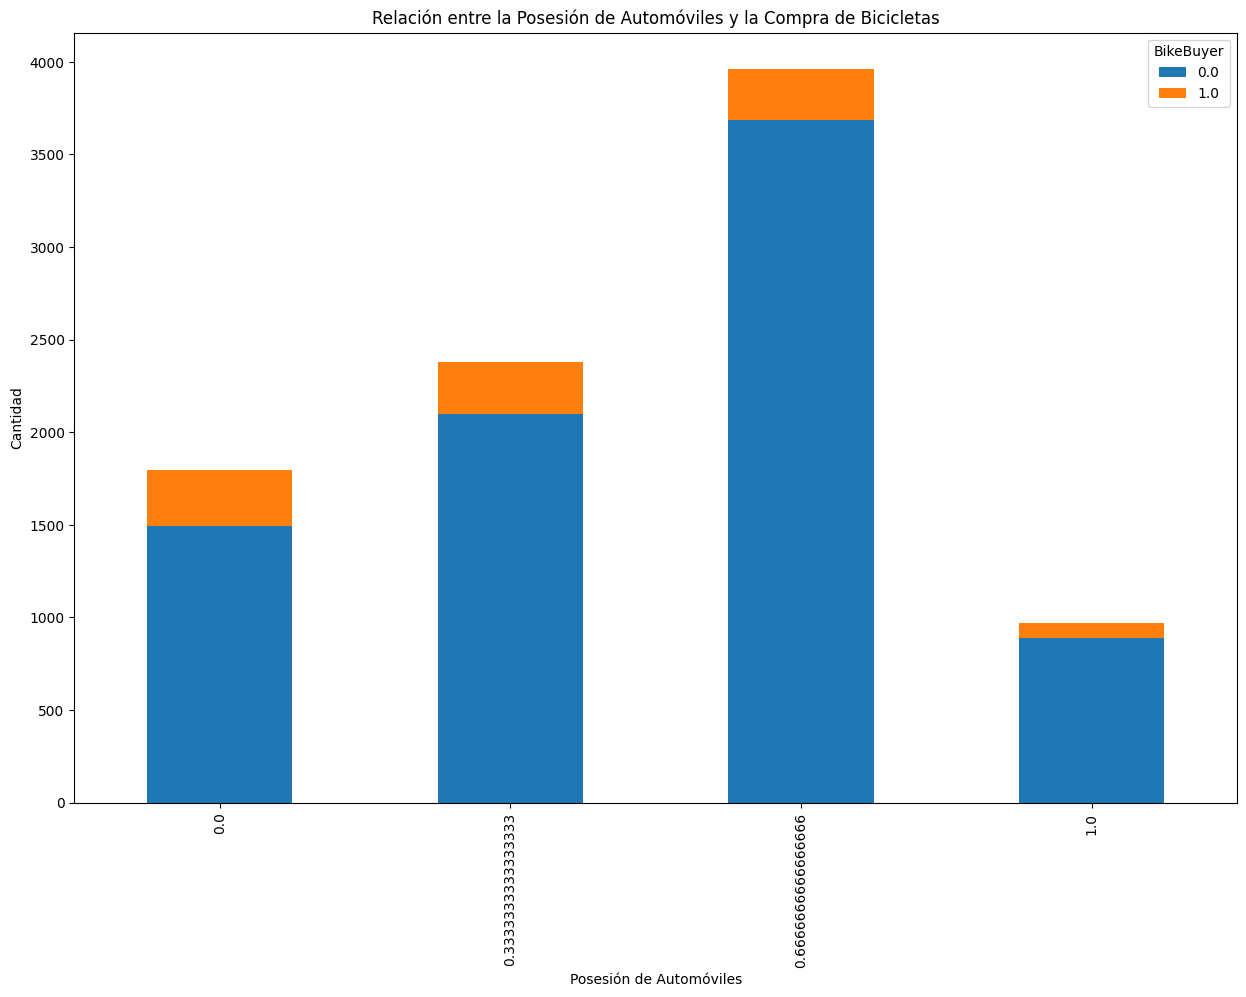

Valor de chi-cuadrado: 140.6765832574144
Valor p: 2.701307146320299e-30
Hay evidencia estadística para rechazar la hipótesis nula de independencia.
La posesión de automóviles y la compra de bicicletas parecen estar relacionados.


In [ ]:
tabla_contingencia = pd.crosstab(df['Cars'], df['BikeBuyer'])
print(tabla_contingencia)
tabla_contingencia.plot(kind='bar', stacked=True)
plt.title('Relación entre la Posesión de Automóviles y la Compra de Bicicletas')
plt.xlabel('Posesión de Automóviles')
plt.ylabel('Cantidad')
plt.show()
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print(f"Valor de chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
if p < 0.05:
    print("Hay evidencia estadística para rechazar la hipótesis nula de independencia.")
    print("La posesión de automóviles y la compra de bicicletas parecen estar relacionados.")
else:
    print("No hay suficiente evidencia estadística para rechazar la hipótesis nula de independencia.")
    print("La posesión de automóviles y la compra de bicicletas parecen ser independientes.")

Se rechaza independencia, y se considera que ambas variables poseen aparente relación.

## "Commute Distance"

BikeBuyer          0.0  1.0
Commute Distance           
0.000000          2452  380
0.105263          1547  176
0.315789          1229  176
0.736842          1694  127
1.000000          1249   74


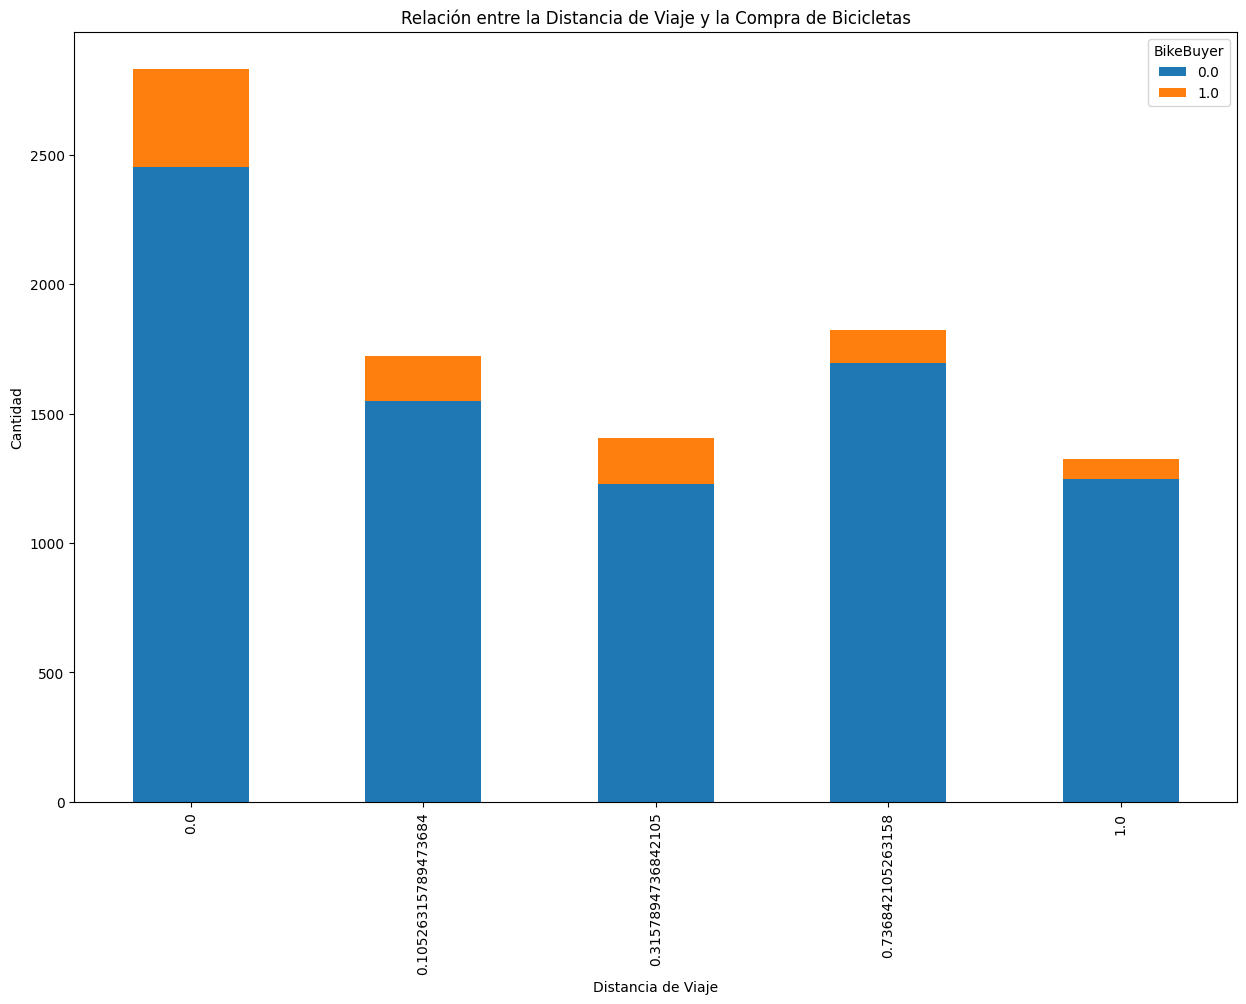

Valor de chi-cuadrado: 91.25720507392793
Valor p: 7.118723111798704e-19
Hay evidencia estadística para rechazar la hipótesis nula de independencia.
La distancia de viaje y la compra de bicicletas parecen estar relacionados.


In [ ]:
tabla_contingencia = pd.crosstab(df['Commute Distance'], df['BikeBuyer'])
print(tabla_contingencia)
tabla_contingencia.plot(kind='bar', stacked=True)
plt.title('Relación entre la Distancia de Viaje y la Compra de Bicicletas')
plt.xlabel('Distancia de Viaje')
plt.ylabel('Cantidad')
plt.show()
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print(f"Valor de chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
if p < 0.05:
    print("Hay evidencia estadística para rechazar la hipótesis nula de independencia.")
    print("La distancia de viaje y la compra de bicicletas parecen estar relacionados.")
else:
    print("No hay suficiente evidencia estadística para rechazar la hipótesis nula de independencia.")
    print("La distancia de viaje y la compra de bicicletas parecen ser independientes.")

Se rechaza independencia, y se considera que ambas variables poseen aparente relación.

## "Region"

BikeBuyer   0.0  1.0
Region              
0.0        1146  207
0.5        4727  460
1.0        2298  266


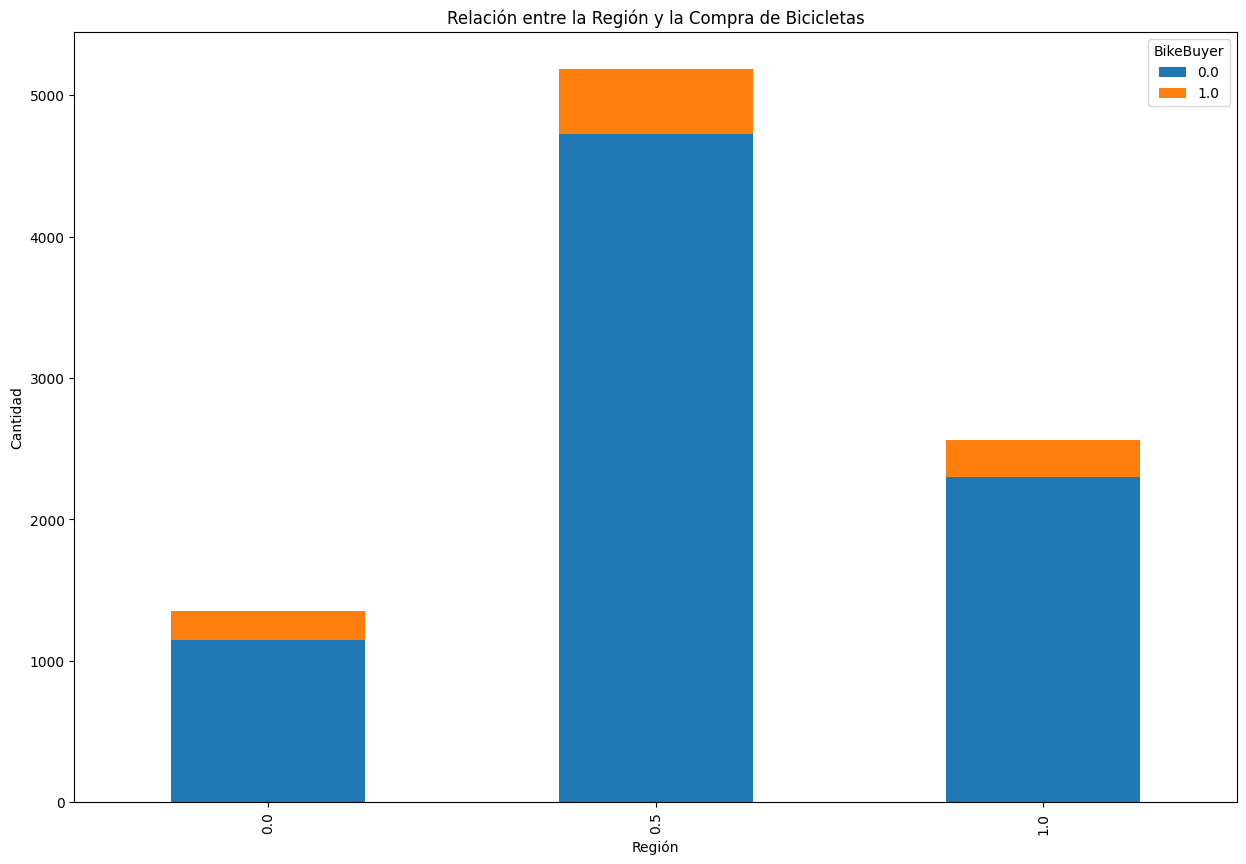

Valor de chi-cuadrado: 48.3123314419238
Valor p: 3.229315844570534e-11
Hay evidencia estadística para rechazar la hipótesis nula de independencia.
La región y la compra de bicicletas parecen estar relacionados.


In [ ]:
tabla_contingencia = pd.crosstab(df['Region'], df['BikeBuyer'])
print(tabla_contingencia)
tabla_contingencia.plot(kind='bar', stacked=True)
plt.title('Relación entre la Región y la Compra de Bicicletas')
plt.xlabel('Región')
plt.ylabel('Cantidad')
plt.show()
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print(f"Valor de chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
if p < 0.05:
    print("Hay evidencia estadística para rechazar la hipótesis nula de independencia.")
    print("La región y la compra de bicicletas parecen estar relacionados.")
else:
    print("No hay suficiente evidencia estadística para rechazar la hipótesis nula de independencia.")
    print("La región y la compra de bicicletas parecen ser independientes.")

Se rechaza independencia, y se considera que ambas variables poseen aparente relación.

## "Age"

BikeBuyer  0.0  1.0
Age                
0.000000    15    1
0.018182   124   12
0.036364   161   18
0.054545   197   25
0.072727   249    7
0.090909   320   13
0.109091   259   25
0.127273   251   14
0.145455   237   26
0.163636   201   24
0.181818   232   25
0.200000   131   43
0.218182   136   64
0.236364   183   46
0.254545   217   38
0.272727   265   37
0.290909   303   21
0.309091   334   29
0.327273   222   36
0.345455   232   28
0.363636   232   36
0.381818   207   33
0.400000   216   31
0.418182   223   35
0.436364   225   23
0.454545   216   19
0.472727   164   28
0.490909   170   25
0.509091   168   16
0.527273   139   25
0.545455   173   10
0.563636   154   15
0.581818   153   12
0.600000   160   10
0.618182   158    6
0.636364    93   12
0.654545   114   16
0.672727   114    7
0.690909    95   10
0.709091    97    1
0.727273    81   10
0.745455    70    8
0.763636    79    1
0.781818    77    2
0.800000    81    0
0.818182    67    1
0.836364    43    5
0.854545    41    3


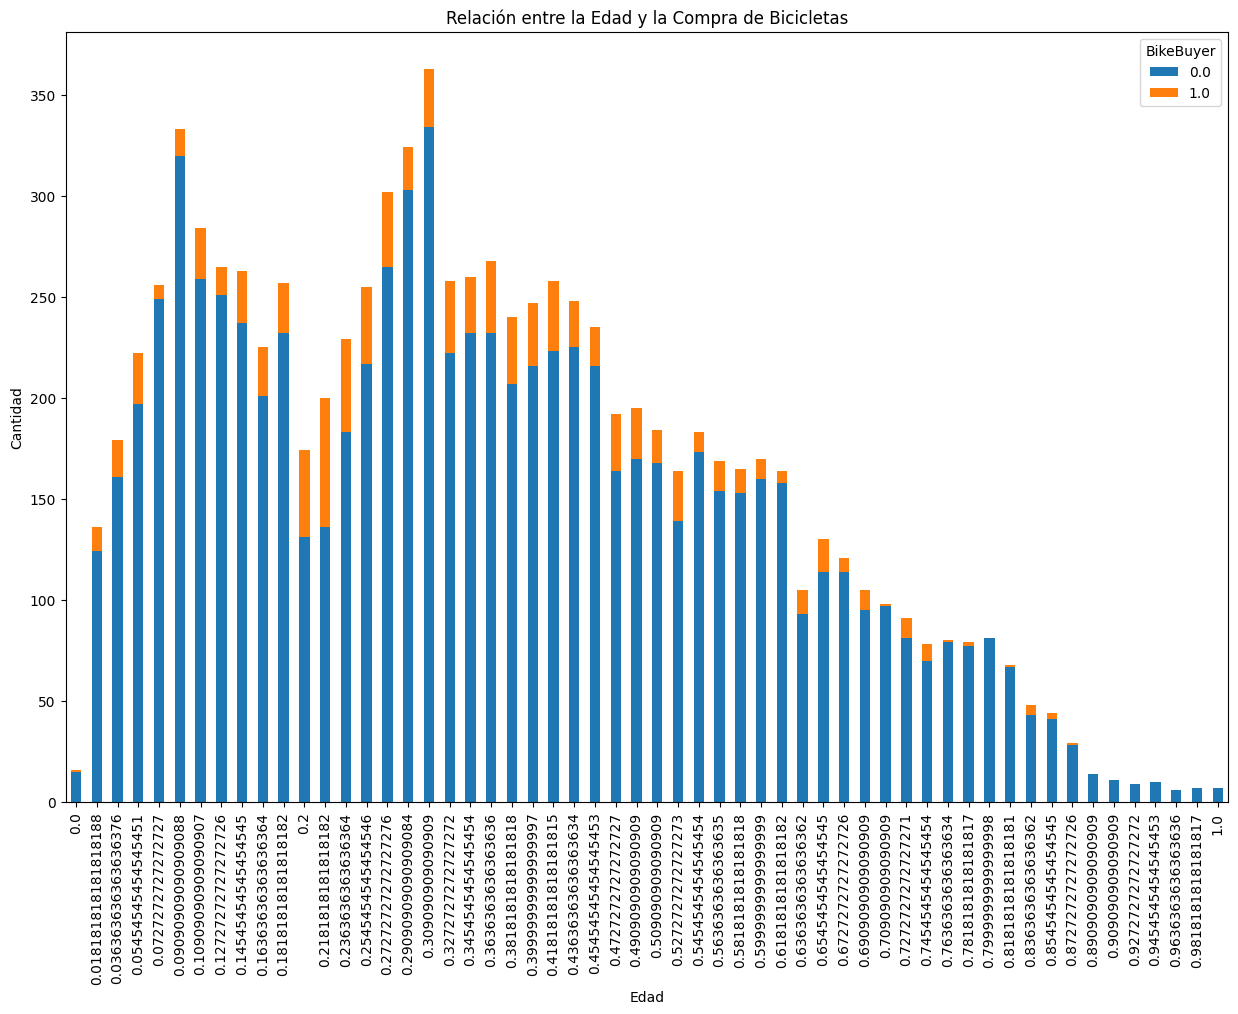

Valor de chi-cuadrado: 312.9683025410032
Valor p: 8.992537475774678e-38
Hay evidencia estadística para rechazar la hipótesis nula de independencia.
La edad y la compra de bicicletas parecen estar relacionados.


In [ ]:
tabla_contingencia = pd.crosstab(df['Age'], df['BikeBuyer'])
print(tabla_contingencia)
tabla_contingencia.plot(kind='bar', stacked=True)
plt.title('Relación entre la Edad y la Compra de Bicicletas')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.show()
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print(f"Valor de chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
if p < 0.05:
    print("Hay evidencia estadística para rechazar la hipótesis nula de independencia.")
    print("La edad y la compra de bicicletas parecen estar relacionados.")
else:
    print("No hay suficiente evidencia estadística para rechazar la hipótesis nula de independencia.")
    print("La edad y la compra de bicicletas parecen ser independientes.")

Se rechaza independencia, y se considera que ambas variables poseen aparente relación.

# Processing Feature Selection: Correlación

Se procede a realizar feature selecting mediante análisis de correlaciones. Para ello, primero se evalúa por el método Pearson, y luego por el método Spearman. Previamente, se descartan las variables "ID" (por pertenecer a un índice), y "Home Owner" (por no presentar relación aparente con la "BikeBuyer"). Luego, cualquier variable que presente correlación fuerte, ya sea positiva o negativa, se considera como prioritaria para el modelo de aprendizaje a desarrollar.

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Cars,Commute Distance,Region,Age,BikeBuyer
Marital Status,1.000000,-0.057202,0.137921,0.116507,-0.144638,-0.195659,-0.002038,0.044634,-0.122248,0.222282,-0.044156
Gender,-0.057202,1.000000,0.006653,-0.002985,-0.004372,-0.006278,-0.000648,-0.001347,0.002942,-0.001111,0.029970
Yearly Income,0.137921,0.006653,1.000000,0.372083,-0.319747,-0.789629,0.230787,0.341036,-0.361993,0.165857,0.042226
Children,0.116507,-0.002985,0.372083,1.000000,-0.023411,-0.187906,0.277873,0.069004,-0.069291,-0.042665,-0.047960
Education,-0.144638,-0.004372,-0.319747,-0.023411,1.000000,0.472219,0.288060,0.063364,0.179448,-0.135315,-0.064088
Occupation,-0.195659,-0.006278,-0.789629,-0.187906,0.472219,1.000000,-0.259245,-0.427915,0.501002,-0.352992,-0.009525
Cars,-0.002038,-0.000648,0.230787,0.277873,0.288060,-0.259245,1.000000,0.402746,-0.244118,0.128341,-0.113794
Commute Distance,0.044634,-0.001347,0.341036,0.069004,0.063364,-0.427915,0.402746,1.000000,-0.307377,0.214689,-0.092137
Region,-0.122248,0.002942,-0.361993,-0.069291,0.179448,0.501002,-0.244118,-0.307377,1.000000,-0.083039,-0.036712
Age,0.222282,-0.001111,0.165857,-0.042665,-0.135315,-0.352992,0.128341,0.214689,-0.083039,1.000000,-0.039894


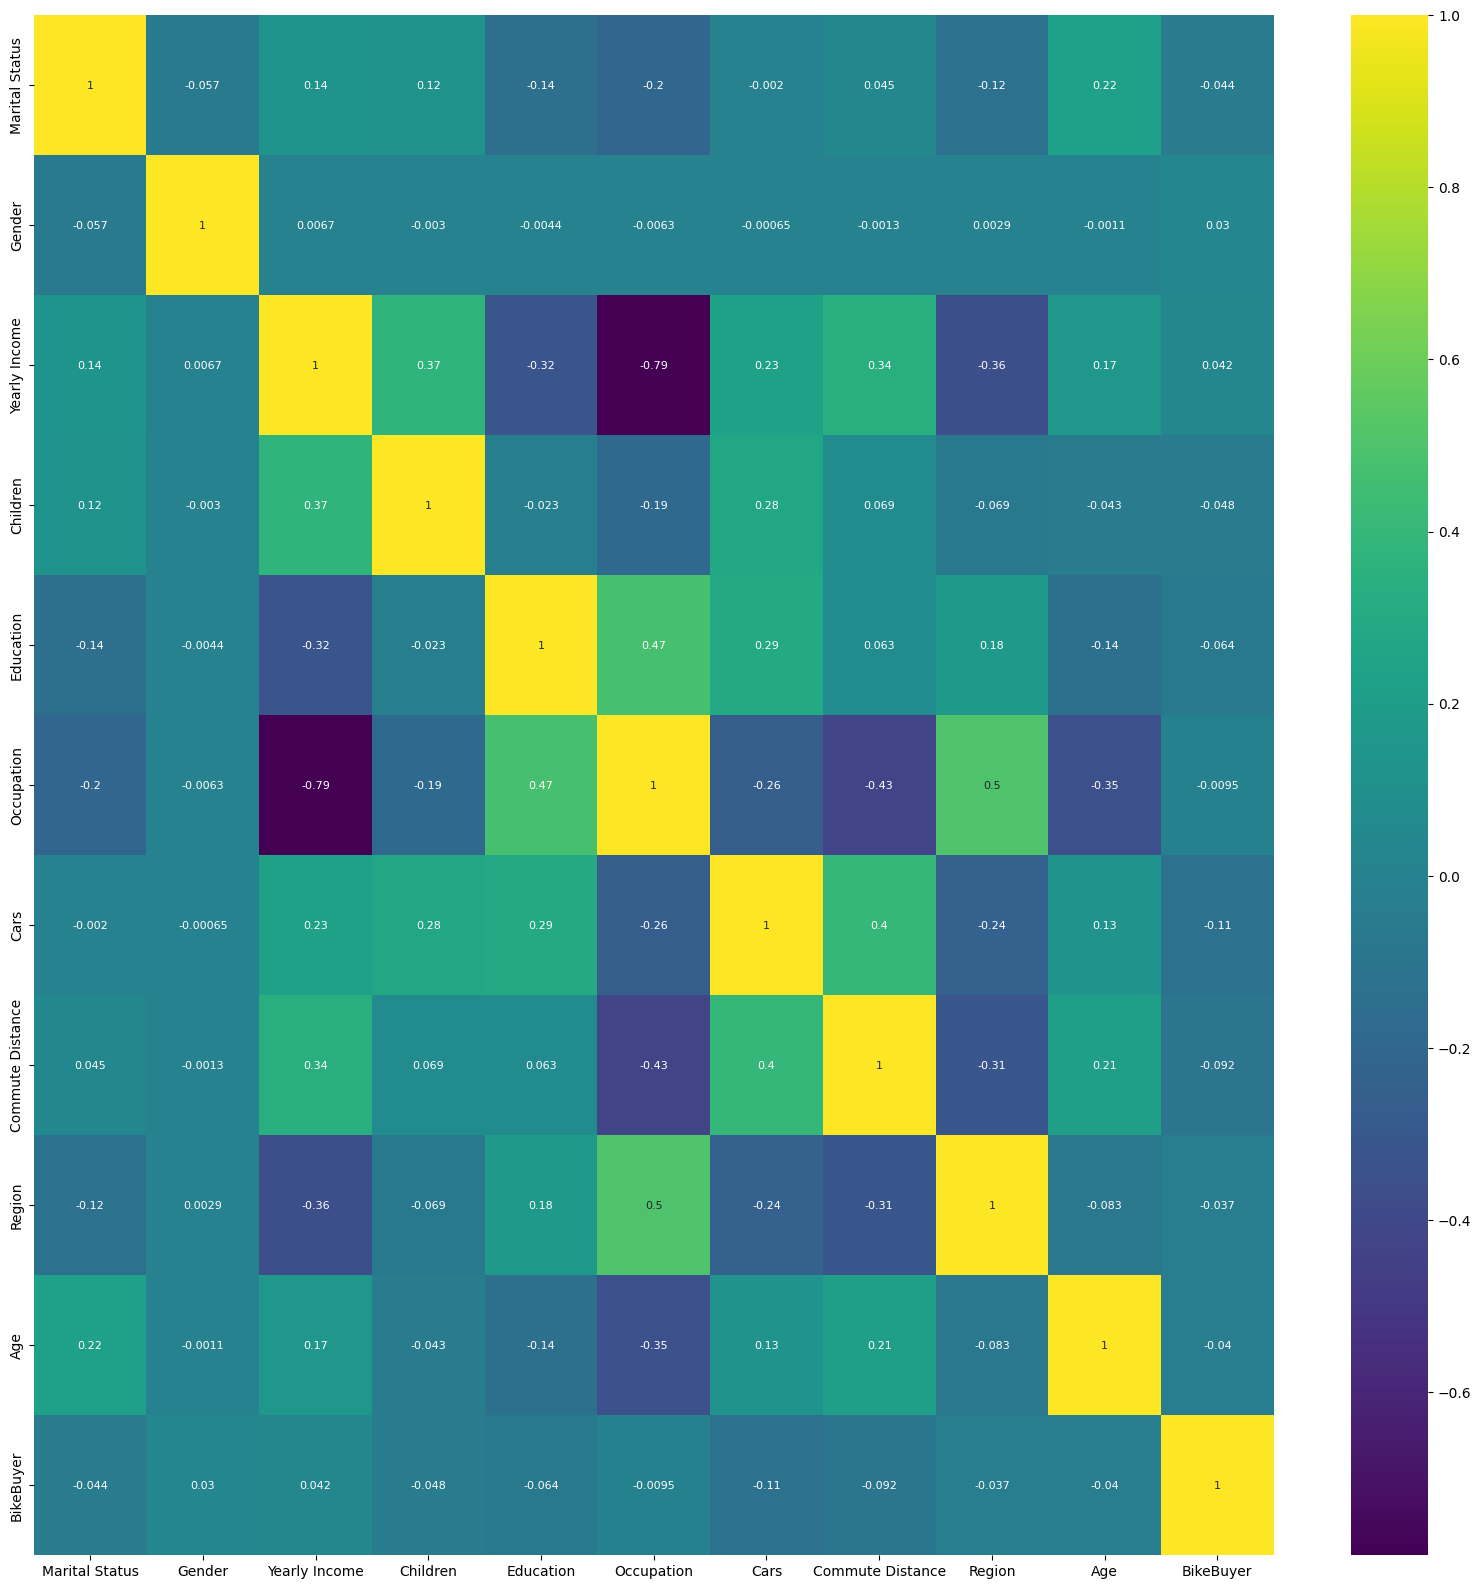

In [ ]:
correlacion_pearson = numeric_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlacion_pearson , annot=True, cmap="viridis",annot_kws={"size":8})
plt.show()

No sé observan valores llamativos de correlación para la variable "BikeBuyer".

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlations = correlation_matrix['BikeBuyer'].sort_values(ascending=False)
print(correlations)

BikeBuyer           1.000000
Yearly Income       0.042226
Gender              0.029970
Occupation         -0.009525
Region             -0.036712
Age                -0.039894
Marital Status     -0.044156
Children           -0.047960
Education          -0.064088
Commute Distance   -0.092137
Cars               -0.113794
Name: BikeBuyer, dtype: float64


En función a los resultados obtenidos por Pearson, y considerando 4 grados de correlación posibles (negativa fuerte para valores menores a -0.3, negativa débil para valores entre -0.3 y 0, positiva débil para valores entre 0 y 0.3, y positiva fuerte para valores mayores a 0.3), se determina para las distintas variables:

*   Existe una correlación positiva débil entre 'Yearly Income' y 'BikeBuyer'.
*   Existe una correlación positiva débil entre 'Gender' y 'BikeBuyer'.
*   Existe una correlación negativa débil entre 'Occupation' y 'BikeBuyer'.
*   Existe una correlación negativa débil entre 'Region' y 'BikeBuyer'.
*   Existe una correlación negativa débil entre 'Age' y 'BikeBuyer'.
*   Existe una correlación negativa débil entre 'Marital Status' y 'BikeBuyer'.
*   Existe una correlación negativa débil entre 'Children' y 'BikeBuyer'.
*   Existe una correlación negativa débil entre 'Education' y 'BikeBuyer'.
*   Existe una correlación negativa débil entre 'Commute Distance' y 'BikeBuyer'.
*   Existe una correlación negativa débil entre 'Cars' y 'BikeBuyer'.

Considernado que Pearson se utiliza mayoritariamente para relacionar dos variables numéricas, y que "BikeBuyer" es categórica, los resultados obtenidos no se consideran prioritarios para tomar una decisión de selección.

In [ ]:
correlations_spearman = numeric_df.corr(method='spearman')['BikeBuyer'].sort_values(ascending=False)
print(correlations_spearman)

BikeBuyer           1.000000
Yearly Income       0.043364
Gender              0.029970
Occupation         -0.006536
Age                -0.030533
Region             -0.032717
Children           -0.040344
Marital Status     -0.044156
Education          -0.062903
Commute Distance   -0.090038
Cars               -0.114065
Name: BikeBuyer, dtype: float64


En función a los resultados obtenidos por Spearman, y considerando 4 grados de correlación posibles (negativa fuerte para valores menores a -0.3, negativa débil para valores entre -0.3 y 0, positiva débil para valores entre 0 y 0.3, y positiva fuerte para valores mayores a 0.3), se determina para las distintas variables:

*   Existe una correlación positiva débil entre 'Yearly Income' y 'BikeBuyer'.
*   Existe una correlación positiva débil entre 'Gender' y 'BikeBuyer'.
*   Existe una correlación negativa débil entre 'Cars' y 'BikeBuyer'.
*   Existe una correlación negativa débil entre 'Children' y 'BikeBuyer'.
*   Existe una correlación negativa débil entre 'Age' y 'BikeBuyer'.
*   Existe una correlación negativa débil entre 'Commute Distance' y 'BikeBuyer'.
*   Existe una correlación negativa débil entre 'Occupation' y 'BikeBuyer'.
*   Existe una correlación negativa débil entre 'Region' y 'BikeBuyer'.
*   Existe una correlación negativa débil entre 'Education' y 'BikeBuyer'.
*   Existe una correlación negativa débil entre 'Marital Status' y 'BikeBuyer'.

Se analizan los casos en que las variables numéricas se relacionan con "BikeBuyer". Luego, se observa que no existen variables en correlación fuerte con la compra de bicicletas. De esta manera, no se selecciona ninguna de las variables como prioritaria para el modelado.


# Elección del Modelo de Aprendizaje: Supervisado por Clasificación

El modelo de aprendizaje no supervisado puede ser útil a la hora de llevar a cabo segmentación de clientes, y reducción de dimensionalidad entre distintas variables. Sin embargo, para el caso específico del Data Set trabajado, lo que se busca llevar a cabo es un análisis sobre datos etiquetados, dado que el objetivo se plantea sobre la tarea de predecir la posible compra de una bicicleta. En otras palabras, si bien un aprendizaje no supervisado podría complementar el análisis, un modelo supervisado permite alcanzar con mayor facilidad una predicción de compra, la cual corresponde al objetivo principal.

Por otro lado, dentro del aprendizaje supervisado, se encuentran  la regresión y la clasificación. Para escoger entre uno y otro, se considera fundamental diferenciar si la variable etiquetada de interés es de tipo contínua o categórica. Como el objetivo principal del proyecto está enfocado en predecir el valor de la variable "BikeBuyer", y la misma no corresponde naturalmente a un valor numérico (independientemente de que se le pueda asignar un número de forma arbitraria a cada valor que puede tomar, a modo de conversión de variable string a float), se buscará realizar determinaciones por clasificación.

# Regresión Logística Primaria

La regresión logística es un método comunmente utilizado para predecir el valor de una variable categórica en función de otras variables con las que se contemple una relación relevante.

In [ ]:
X = df.drop(['BikeBuyer', 'ID'], axis=1)
y = df['BikeBuyer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Exactitud:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Exactitud: 0.9011532125205931

Matriz de confusión:
 [[1641    0]
 [ 180    0]]

Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      1641
         1.0       0.00      0.00      0.00       180

    accuracy                           0.90      1821
   macro avg       0.45      0.50      0.47      1821
weighted avg       0.81      0.90      0.85      1821



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Se observa que la matriz de confusón tiene dificultades para predecir correctamente la compra de bicicletas. A su vez, se observa un reporte de clasificación que indica que tanto la precisión como el recall de la clase positiva son bajos, llevando a la posible obtención de altas tasas de falsos positivos y/o falsos negativos.

A modo de conclusión, esta primera regresión dio como resultado un alto grado de eficiencia a la hora de detectar casos negativos, pero poco satisfactorios para predecir los positivos. En función a dichos resultados, se atribuye la falta de exactititud en el reporte a qué la cantidad de datos crudos de compradores es tan solo un 10% del total disponible. De esta manera, resulta más sencillo predecir casos de rechazo por sobre aprobación, dado que estos últimos resultan minoritarios.

A raíz de los resultados obtenidos mediante la implementación de pruebas sobre la regresión logística inicial, se determina que resulta favorable la utilización de otras herramientas de predicción y testeo, así como también, se evalúa la realización de un posible postprocesamiento. A su vez, se considera prudente volver a realizar una nueva regresión logística luego de dicho proceso.

# Árbol de Decisión Primario

Un árbol de decisión es un modelo de aprendizaje supervisado comunmente utilizado tanto para regresión, como para clasificación.

In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
print("Exactitud del árbol de decisión:", accuracy_score(y_test, y_pred_tree))
print("\nMatriz de confusión del árbol de decisión:\n", confusion_matrix(y_test, y_pred_tree))
print("\nReporte de clasificación del árbol de decisión:\n", classification_report(y_test, y_pred_tree))

Exactitud del árbol de decisión: 0.914332784184514

Matriz de confusión del árbol de decisión:
 [[1597   44]
 [ 112   68]]

Reporte de clasificación del árbol de decisión:
               precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      1641
         1.0       0.61      0.38      0.47       180

    accuracy                           0.91      1821
   macro avg       0.77      0.68      0.71      1821
weighted avg       0.90      0.91      0.91      1821



En una primera instancia, los resultados exhibidos parecen demostrar un mayor grado de precisión sobre la predicción de compra que la regresión logística inicial. De este modo, se procede a obtener un análisis del árbol de decisión.

In [ ]:
dot_data = export_graphviz(tree_model, out_file=None,
                         feature_names=X.columns,
                         class_names=['No Compra', 'Compra'],
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph
importances = tree_model.feature_importances_
feature_importances = pd.DataFrame({'Característica': X.columns, 'Importancia': importances})
feature_importances = feature_importances.sort_values('Importancia', ascending=False)
print(feature_importances)
print("Profundidad del árbol:", tree_model.get_depth())
print("Número de nodos hoja:", tree_model.get_n_leaves())

     Característica  Importancia
9               Age     0.311100
2     Yearly Income     0.118441
7  Commute Distance     0.108663
1            Gender     0.084465
3          Children     0.082860
0    Marital Status     0.081608
6              Cars     0.073076
4         Education     0.058812
5        Occupation     0.047184
8            Region     0.033791
Profundidad del árbol: 26
Número de nodos hoja: 991


Se observa en los resultados exhibidos que aquellas variables que se obtuvieron como las de mayor importancia son la edad, la distancia de viaje, y el ingreso anual. De dicho modo, se procede a un nuevo procesamiento de los datos.

# Post-Processing Feature Selection: Filtrado según Resultado de las Pruebas

In [ ]:
top_features = feature_importances['Característica'][:3].tolist()
print("Las variables más importantes son:", top_features)
X_important = df[top_features]

Las variables más importantes son: ['Age', 'Yearly Income', 'Commute Distance']


En función a la obtención de las variables "Age", "Commute Distance" y "Yearly Income" como las más importantes, se procede a descartar las columnas restantes.

In [ ]:
df = df.drop(columns=[col for col in df.columns if col not in top_features + ['BikeBuyer']])

# Regresión Logística Secundaria y Árbol de Decisión Secundario

In [ ]:
X = df.drop('BikeBuyer', axis=1)
y = df['BikeBuyer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Exactitud:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Exactitud: 0.9011532125205931

Matriz de confusión:
 [[1641    0]
 [ 180    0]]

Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      1641
         1.0       0.00      0.00      0.00       180

    accuracy                           0.90      1821
   macro avg       0.45      0.50      0.47      1821
weighted avg       0.81      0.90      0.85      1821



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
print("Exactitud del árbol de decisión:", accuracy_score(y_test, y_pred_tree))
print("\nMatriz de confusión del árbol de decisión:\n", confusion_matrix(y_test, y_pred_tree))
print("\nReporte de clasificación del árbol de decisión:\n", classification_report(y_test, y_pred_tree))

Exactitud del árbol de decisión: 0.9033498077979132

Matriz de confusión del árbol de decisión:
 [[1608   33]
 [ 143   37]]

Reporte de clasificación del árbol de decisión:
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1641
         1.0       0.53      0.21      0.30       180

    accuracy                           0.90      1821
   macro avg       0.72      0.59      0.62      1821
weighted avg       0.88      0.90      0.88      1821



Luego de haber descartado aquellas variables que no resultan ser las de mayor importancia, se observa un bajo grado de variación tanto a nivel de la regresión logística como al del árbol de decisión. De este modo, se determina que posiblemente las variables descartadas fueran de baja relevancia sobre la compra de bicicletas.

Por otro lado, los resultados obtenidos en términos de eficiencia de predicción siguen siendo menos satisfactorios de lo esperado. A raíz de lo mencionado, se precedo a la realización de balanceo de datos.

# Balanceo de datos: Oversampling o Undersampling

Dado que se atribuye la baja eficiencia del modelo a la proporción de casos positivos por sobre el total, se considera prudente llevar a cabo un balanceo de datos. Dicho proceso puede ser tipo Oversampling (se aumenta la cantidad de muestras de compradores de bicicletas creando copias sintéticas de las existentes), o Undersampling (se disminuye la cantidad de muestras de no compradores de bicicletas eliminando aleatoriamente datos de la clase mayoritaria).

In [ ]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
model_resampled = LogisticRegression()
model_resampled.fit(X_resampled, y_resampled)
y_pred_resampled = model_resampled.predict(X_test)
print("Exactitud (Oversampling):", accuracy_score(y_test, y_pred_resampled))
print("\nMatriz de confusión (Oversampling):\n", confusion_matrix(y_test, y_pred_resampled))
print("\nReporte de clasificación (Oversampling):\n", classification_report(y_test, y_pred_resampled))
rus = RandomUnderSampler(random_state=42)
X_resampled_under, y_resampled_under = rus.fit_resample(X_train, y_train)
model_resampled_under = LogisticRegression()
model_resampled_under.fit(X_resampled_under, y_resampled_under)
y_pred_resampled_under = model_resampled_under.predict(X_test)
print("Exactitud (Undersampling):", accuracy_score(y_test, y_pred_resampled_under))
print("\nMatriz de confusión (Undersampling):\n", confusion_matrix(y_test, y_pred_resampled_under))
print("\nReporte de clasificación (Undersampling):\n", classification_report(y_test, y_pred_resampled_under))

Exactitud (Oversampling): 0.5771554091158704

Matriz de confusión (Oversampling):
 [[931 710]
 [ 60 120]]

Reporte de clasificación (Oversampling):
               precision    recall  f1-score   support

         0.0       0.94      0.57      0.71      1641
         1.0       0.14      0.67      0.24       180

    accuracy                           0.58      1821
   macro avg       0.54      0.62      0.47      1821
weighted avg       0.86      0.58      0.66      1821

Exactitud (Undersampling): 0.5518945634266886

Matriz de confusión (Undersampling):
 [[875 766]
 [ 50 130]]

Reporte de clasificación (Undersampling):
               precision    recall  f1-score   support

         0.0       0.95      0.53      0.68      1641
         1.0       0.15      0.72      0.24       180

    accuracy                           0.55      1821
   macro avg       0.55      0.63      0.46      1821
weighted avg       0.87      0.55      0.64      1821



A partir de la evaluación de los resultados obtenidos, se observa que ambos métodos proporcionan un aumento significativo de la precisión del modelo. Sin embargo, a la hora de escoger uno de los dos tipos de balanceo, se determine que es preferible, para el caso de este Data Set, la utilización de Oversampling, dado que realizar Undersampling puede llevar pérdidas significativas de información.

# Feature Engineering: Transformaciones y Combinaciones

Para poder continuar mejorando el modelo de aprendizaje supervisado, se realiza lo que se conoce como ingeniería de características. Mediante dicho proceso, se procede a la creación de 2 nuevas variables a partir de las ya existentes.

In [ ]:
df['Age_squared'] = df['Age'] ** 2
df['Income_Distance_Ratio'] = df['Yearly Income'] / (df['Commute Distance'] + 1)
X = df.drop('BikeBuyer', axis=1)
y = df['BikeBuyer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
model_resampled = LogisticRegression()
model_resampled.fit(X_resampled, y_resampled)
y_pred_resampled = model_resampled.predict(X_test)
print("Exactitud (Oversampling):", accuracy_score(y_test, y_pred_resampled))
print("\nMatriz de confusión (Oversampling):\n", confusion_matrix(y_test, y_pred_resampled))
print("\nReporte de clasificación (Oversampling):\n", classification_report(y_test, y_pred_resampled))

Exactitud (Oversampling): 0.5579352004393191

Matriz de confusión (Oversampling):
 [[898 743]
 [ 62 118]]

Reporte de clasificación (Oversampling):
               precision    recall  f1-score   support

         0.0       0.94      0.55      0.69      1641
         1.0       0.14      0.66      0.23       180

    accuracy                           0.56      1821
   macro avg       0.54      0.60      0.46      1821
weighted avg       0.86      0.56      0.64      1821



Mediante la incorporación de las características "Age squared" (la edad elevada al cuadrado), e "Income Distance Ratio" (la relación entre los ingresos anuales y la distancia de viaje, agregando un 1 al denominador para evitar divisiones por 0), se obtienen mejorías en la eficiencia del modelo.

In [ ]:
df = df.drop(['Age', 'Commute Distance', 'Yearly Income'], axis=1)

# Regresión Logística Terciaria

Una vez realizado el balanceo de datos, y aplicada la ingeniería de características, se procede a la aplicación de una nueva regresión logística.

In [ ]:
X = df.drop('BikeBuyer', axis=1)
y = df['BikeBuyer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
model_resampled = LogisticRegression()
model_resampled.fit(X_resampled, y_resampled)
y_pred_resampled = model_resampled.predict(X_test)
print("Exactitud (Oversampling):", accuracy_score(y_test, y_pred_resampled))
print("\nMatriz de confusión (Oversampling):\n", confusion_matrix(y_test, y_pred_resampled))
print("\nReporte de clasificación (Oversampling):\n", classification_report(y_test, y_pred_resampled))

Exactitud (Oversampling): 0.5678198791872597

Matriz de confusión (Oversampling):
 [[932 709]
 [ 78 102]]

Reporte de clasificación (Oversampling):
               precision    recall  f1-score   support

         0.0       0.92      0.57      0.70      1641
         1.0       0.13      0.57      0.21       180

    accuracy                           0.57      1821
   macro avg       0.52      0.57      0.45      1821
weighted avg       0.84      0.57      0.65      1821



Luego de haber descartado las variables originales, y de haber realizado una nueva regresión logística utilizando únicamente las características generadas mediante ingeniería, se observa una mejora en la eficiencia del modelo.

A modo de conclusión, se puede observar que la aplicación de distintos métodos de aprendizaje supervisado, así como también la implementación de técnicas de pre-processing, processing y post-processing, permiten obtener un modelo que predice con un mayor grado de efectividad la potencial compra de bicicletas por parte de los clientes.


# Ajuste de Hiperparámetros

El ajuste de hiperparámetros es una herramienta que permite modificar el rendimiento de un modelo, controlando el proceso de entrenamiento. Se procede a ajustar los hiperparámetros sobre los datos con oversampling para evaluar las predicciones del modelo de prueba.

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

model = LogisticRegression()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)
print("Mejores hiperparámetros:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Exactitud (Oversampling con ajuste de hiperparámetros):", accuracy_score(y_test, y_pred_best))
print("\nMatriz de confusión (Oversampling con ajuste de hiperparámetros):\n", confusion_matrix(y_test, y_pred_best))
print("\nReporte de clasificación (Oversampling con ajuste de hiperparámetros):\n", classification_report(y_test, y_pred_best))

Mejores hiperparámetros: {'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}
Exactitud (Oversampling con ajuste de hiperparámetros): 0.5777045579352005

Matriz de confusión (Oversampling con ajuste de hiperparámetros):
 [[951 690]
 [ 79 101]]

Reporte de clasificación (Oversampling con ajuste de hiperparámetros):
               precision    recall  f1-score   support

         0.0       0.92      0.58      0.71      1641
         1.0       0.13      0.56      0.21       180

    accuracy                           0.58      1821
   macro avg       0.53      0.57      0.46      1821
weighted avg       0.84      0.58      0.66      1821



Luego de realizar el ajuste de hiperparámetros sobre la regresión logística con oversampling, se observa una mejora en la precisión, recall y f1-score para la clase positiva (compra de bicicleta). Esto indica que el modelo ahora es capaz de identificar mejor a los potenciales compradores de bicicletas. Los mejores hiperparámetros encontrados fueron:

*   penalty: l1
*   C: 10
*   solver: liblinear

Estos valores indican que se está utilizando una regularización L1 (que ayuda a reducir el sobreajuste del modelo), un valor de C relativamente alto (que indica una menor regularización, permitiendo que el modelo se ajuste más a los datos de entrenamiento) y el solver 'liblinear' (que es adecuado para problemas de clasificación binaria). En general, el ajuste de hiperparámetros ha mejorado el rendimiento del modelo en la tarea de predecir la compra de bicicletas.

# Visualización e Interpretación del Modelo Obtenido

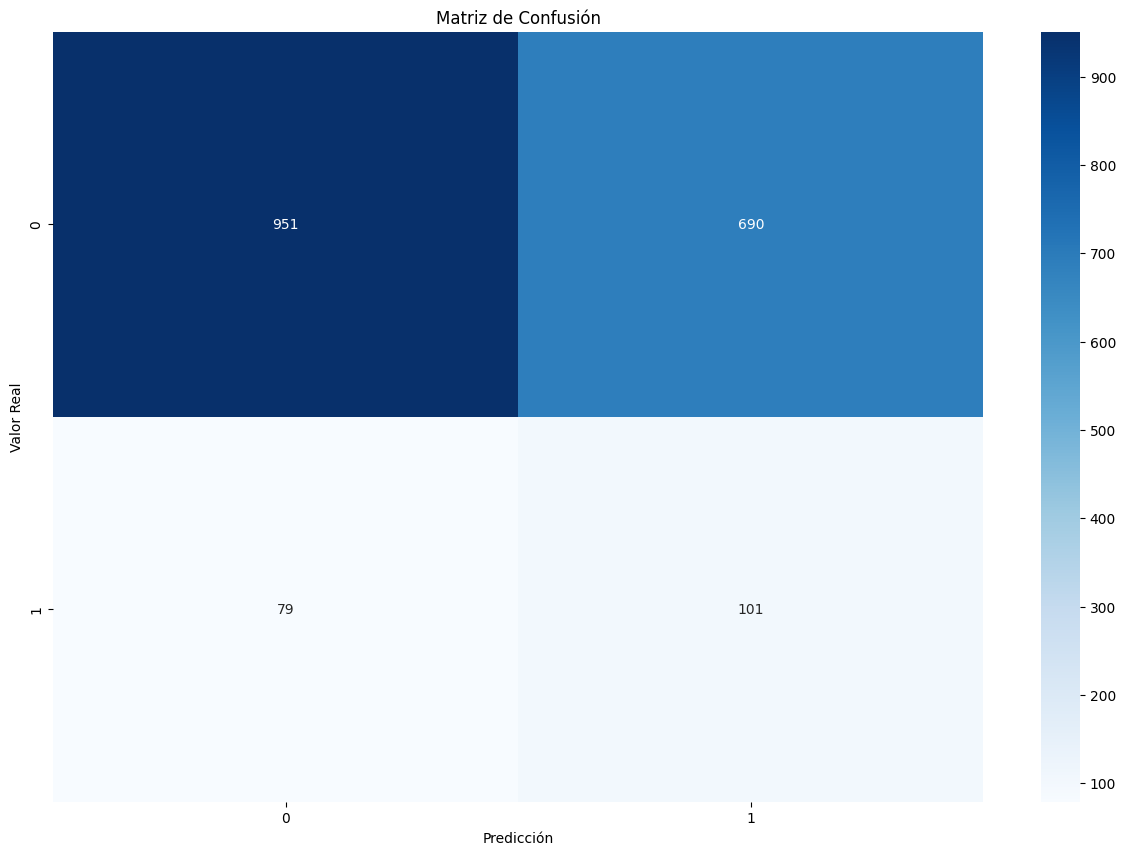

In [ ]:
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

Se observa qué, luego del proceso de manipulación de los datos, el modelo resultante resulta efectivo tanto para la determinación de casos de compradores, como de no compradores. En otras palabras, a pesar de la baja proporción de positivos en el Data Set crudo, se presenta un modelo que tiene mayor probabilidad de predecir correctamente la compra, que de obtener un resultado distinto al valor real.

# Conclusiones

A partir del análisis exploratorio de datos, la aplicación de pruebas estadísticas y el desarrollo de modelos de aprendizaje automático, se ha logrado construir un modelo que predice con una precisión aceptable (más de las mitad de las predicciones, tanto positivas como negativas, son exitosas) la probabilidad de que un cliente compre una bicicleta. Los hallazgos más relevantes del análisis son:

*   Las variables más importantes para predecir la compra de bicicletas son la edad, la distancia del viaje diario y los ingresos anuales.
*   La ingeniería de características, creando nuevas variables a partir de las existentes, mejoró significativamente la precisión del modelo.
*   El balanceo de datos, mediante la técnica de oversampling, ayudó a mejorar la capacidad del modelo para identificar a los compradores de bicicletas.
*   El ajuste de hiperparámetros permitió optimizar aún más el rendimiento del modelo.

Este modelo puede ser utilizado por la empresa para dirigir sus esfuerzos de marketing de manera más efectiva, enfocándose en aquellos clientes con mayor probabilidad de comprar una bicicleta. Además, el análisis realizado proporciona información valiosa sobre las características de los clientes que compran bicicletas, lo que puede ayudar a la empresa a diseñar estrategias de producto y precios más adecuadas.

Es importante destacar que este modelo es una herramienta de apoyo a la toma de decisiones y no debe ser considerado como una predicción infalible. La decisión final de compra de un cliente dependerá de una serie de factores adicionales que no han sido considerados en este análisis.
